# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

<h3>Used Car Dealership Recommendation</h3>

The data task involves conducting an analysis to determine the influential factors that impact the pricing of used cars. This entails identifying the key features and attributes of the cars within the dataset that have a significant correlation with their respective prices. The objective is to apply data exploration and statistical techniques to uncover patterns, relationships, and trends within the dataset, ultimately leading to insights that can guide the used car dealership in understanding what aspects consumers value the most when considering the purchase of a used car.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats
import warnings
import statsmodels.api as sm
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer, make_column_selector, TransformedTargetRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.inspection import permutation_importance
from sklearn import set_config
from sklearn.feature_selection import SequentialFeatureSelector

In [2]:
# Load the data
# uc -> Used Cars
uc = pd.read_csv('data/vehicles.csv')
uc.head()

id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

### Exploratory Data Analysis

- First, we need to analyze/understand the data set before making any decisions.
- Use .info() method and it returns column names and their data types as well as non-null values and memory usage
- Use .describe() method and it generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution.
- Print column names
- Verify any duplicate rows in the data set
- Verify any missing values in the data set.
- Look into the specifics of each column using .value_counts()
- Find correlation in numeric features.

In [3]:
uc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

#### Descriptive Analysis:

    - The data set contains 14 categorical and 4 numerical features.

In [4]:
uc.describe(include='all')

id    region         price           year manufacturer  \
count   4.268800e+05    426880  4.268800e+05  425675.000000       409234   
unique           NaN       404           NaN            NaN           42   
top              NaN  columbus           NaN            NaN         ford   
freq             NaN      3608           NaN            NaN        70985   
mean    7.311487e+09       NaN  7.519903e+04    2011.235191          NaN   
std     4.473170e+06       NaN  1.218228e+07       9.452120          NaN   
min     7.207408e+09       NaN  0.000000e+00    1900.000000          NaN   
25%     7.308143e+09       NaN  5.900000e+03    2008.000000          NaN   
50%     7.312621e+09       NaN  1.395000e+04    2013.000000          NaN   
75%     7.315254e+09       NaN  2.648575e+04    2017.000000          NaN   
max     7.317101e+09       NaN  3.736929e+09    2022.000000          NaN   

         model condition    cylinders    fuel      odometer title_status  \
count   421603    252776       249202  423867  4.224800e+05       418638   
unique   29649         6            8       5           NaN            6   
top      f-150      good  6 cylinders     gas           NaN        clean   
freq      8009    121456        94169  356209           NaN       405117   
mean       NaN       NaN          NaN     NaN  9.804333e+04          NaN   
std        NaN       NaN          NaN     NaN  2.138815e+05          NaN   
min        NaN       NaN          NaN     NaN  0.000000e+00          NaN   
25%        NaN       NaN          NaN     NaN  3.770400e+04          NaN   
50%        NaN       NaN          NaN     NaN  8.554800e+04          NaN   
75%        NaN       NaN          NaN     NaN  1.335425e+05          NaN   
max        NaN       NaN          NaN     NaN  1.000000e+07          NaN   

       transmission                VIN   drive       size    type paint_color  \
count        424324             265838  296313     120519  334022      296677   
unique            3             118246       3          4      13          12   
top       automatic  1FMJU1JT1HEA52352     4wd  full-size   sedan       white   
freq         336524                261  131904      63465   87056       79285   
mean            NaN                NaN     NaN        NaN     NaN         NaN   
std             NaN                NaN     NaN        NaN     NaN         NaN   
min             NaN                NaN     NaN        NaN     NaN         NaN   
25%             NaN                NaN     NaN        NaN     NaN         NaN   
50%             NaN                NaN     NaN        NaN     NaN         NaN   
75%             NaN                NaN     NaN        NaN     NaN         NaN   
max             NaN                NaN     NaN        NaN     NaN         NaN   

         state  
count   426880  
unique      51  
top         ca  
freq     50614  
mean       NaN  
std        NaN  
min        NaN  
25%        NaN  
50%        NaN  
75%        NaN  
max        NaN

In [5]:
# Print column names
uc.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [6]:
# Print duplicated rows in the dataset
uc.duplicated().sum()

0

In [7]:
# Print column names with count of missing values
uc.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

#### Observations:

    - The 'size' feature is missing most of the values

In [8]:
# Print the percentage of null values for columns that have null values in a Pandas DataFrame.
def print_nan_percent(df):
    
  null_columns = df.columns[df.isnull().any()]
  null_values = df[null_columns].isnull().sum()
  null_percent = null_values / df.shape[0] * 100

  print('Columns with null (NaN) values percentage:')
  for i, column in enumerate(null_columns):
    print(f'{column}: {null_percent[i]:.2f}%')
    
print_nan_percent(uc)

Columns with null (NaN) values percentage:
year: 0.28%
manufacturer: 4.13%
model: 1.24%
condition: 40.79%
cylinders: 41.62%
fuel: 0.71%
odometer: 1.03%
title_status: 1.93%
transmission: 0.60%
VIN: 37.73%
drive: 30.59%
size: 71.77%
type: 21.75%
paint_color: 30.50%


#### Observations:

    - Most vehicles have a specified year, making it suitable for analysis without significant data loss.
    - The high percentage of missing condition values might suggest that consider treating this as a categorical variable with a separate category for missing values.
    - The significant percentage of missing cylinder data consider imputing based on the vehicle's model or manufacturer, as they often correlate with cylinder counts.
    - The high percentage of missing VINs suggests that it might be best to analyze the impact of VIN availability on other variables rather than using the VIN itself.
    - The substantial percentage of missing drive information might indicate that it's not always specified or recorded.
    - The extremely high percentage of missing size values suggests that this column might not be reliable for analysis.
    - The moderate percentage of missing vehicle type data could still allow for meaningful analysis.Consider imputing with the most common type within each manufacturer or model.
    - The substantial percentage of missing paint color values indicates that this information might not always be provided or recorded.

In [9]:
# Next, find the frequency of categories and imbalance or biased data in the dataset.
# print value counts for each non-numeric column in the data frame

# The below code is printing long output and is not readable so will print each column separately.
# Please uncomment before running this celll

# for column in uc.select_dtypes(include=['object']).columns:   
#     print("\n"+ column +":\n", uc[column].value_counts())

#### Observations:
    - The most popular car brand is Ford, followed by Chevrolet, Toyota, Honda, and Nissan.
    - The most popular car model is the F-150, followed by the Silverado 1500, 1500, Camry, and Silverado.
    - The most popular car condition is good, followed by excellent and like new.
    - The most popular number of cylinders is 6, followed by 4 and 8.
    - The most popular fuel type is gas, followed by other, diesel, hybrid, and electric.
    - The most popular title status is clean, followed by rebuilt, salvage, lien, and missing.
    - The most popular transmission type is automatic, followed by other and manual.
    - The most popular state is California, followed by Florida, Texas, New York, and Ohio.
    - The most popular drive type is 4wd, followed by fwd and rwd.
    - The most popular size is full-size, followed by mid-size, compact, and sub-compact.
    - The most popular type is sedan, followed by SUV, pickup, truck, and other.
    - The most popular paint color is white, followed by black, silver, blue, and red.


In [10]:
# Count occurrences of specific values in each column
zero_formats = ['0', '00', '000', '0000', '00000', '000000']
uc.applymap(lambda x: str(x) in zero_formats).sum()

id                  0
region              0
price           32895
year                0
manufacturer        0
model               4
condition           0
cylinders           0
fuel                0
odometer            0
title_status        0
transmission        0
VIN                25
drive               0
size                0
type                0
paint_color         0
state               0
dtype: int64

#### Observations:
    - These zero values could be due to data entry errors or other reasons.
    - We might need to decide whether to impute these values or exclude rows with missing values from our analysis.

<h3>Visual Data Analysis<h3>

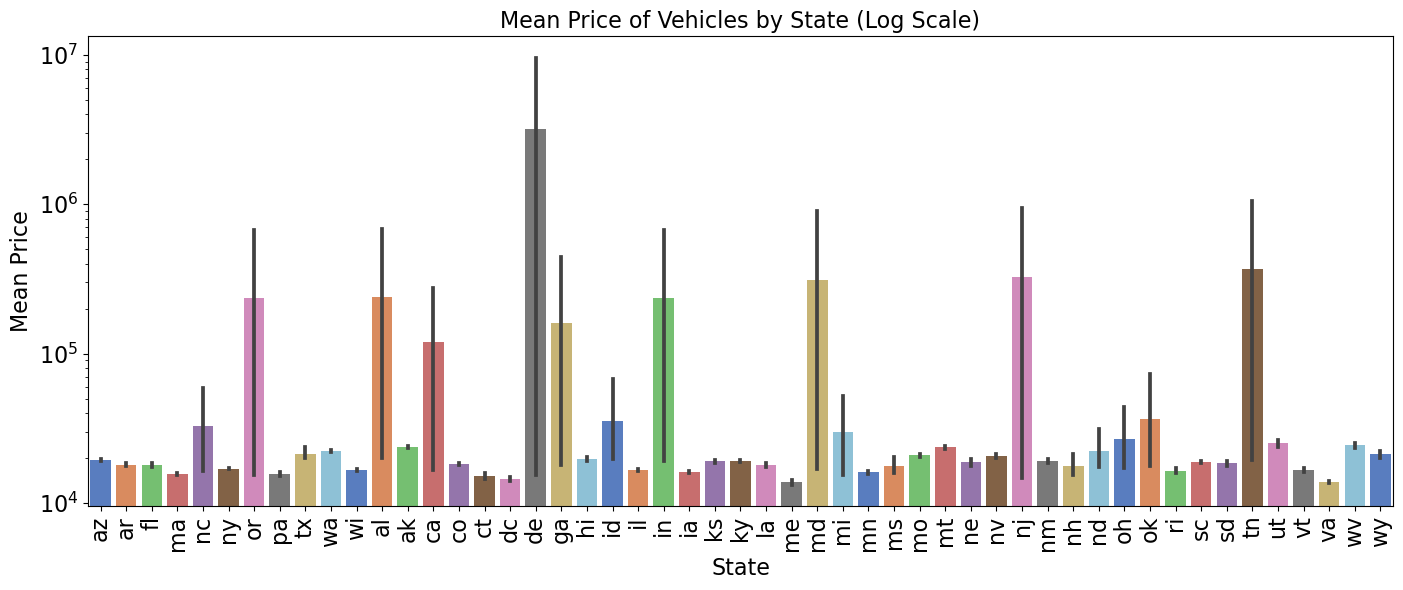

In [11]:
# Create a bar plot of the mean price of vehicles by state
# Set the size of the plot
plt.figure(figsize=(14, 6))

# Create a bar plot
sns.barplot(data=uc, x='state', y='price', log=True, palette='muted')

# Set plot title and labels
plt.title('Mean Price of Vehicles by State (Log Scale)', fontsize=16)
plt.xlabel('State', fontsize=16)
plt.ylabel('Mean Price', fontsize=16)
plt.xticks(rotation=90, fontsize=16)
plt.tight_layout()
plt.yticks(fontsize=16)
# Save the plot as an image
plt.savefig("images/vehicles_price_by_state.png")
plt.show()

#### Observations:
    - Delaware has the highest average log price, indicating that vehicles tend to be relatively more expensive in this state.
    - Virginia (VA) has the lowest average log price, suggesting that vehicles are generally more affordable in this state.

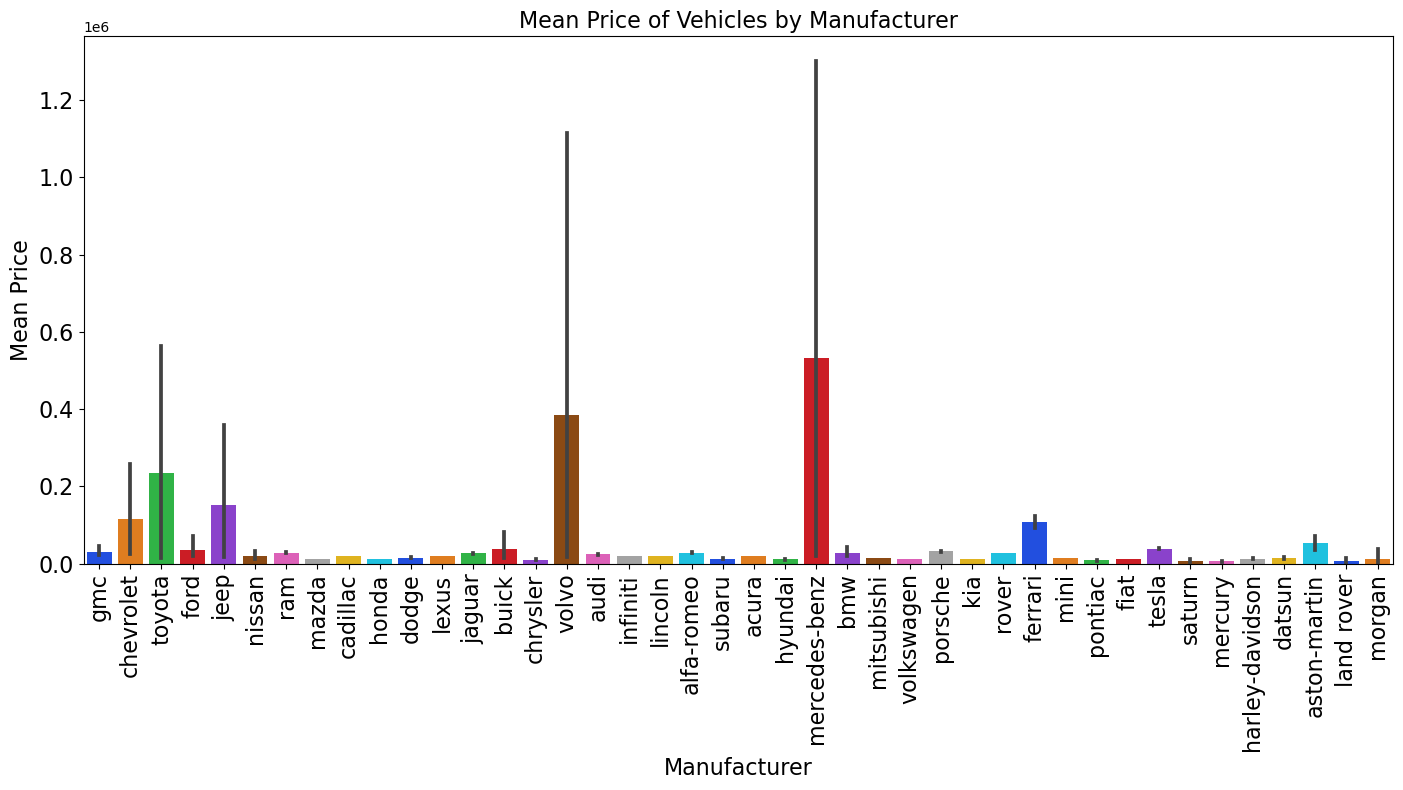

In [12]:
# Create a bar plot of the mean price of vehicles by manufacturer
# Set the size of the plot
plt.figure(figsize=(14, 8))

# Create a bar plot
sns.barplot(data=uc, x='manufacturer', y='price', palette='bright')

# Set plot title and labels
plt.title('Mean Price of Vehicles by Manufacturer', fontsize=16)
plt.xlabel('Manufacturer', fontsize=16)
plt.ylabel('Mean Price', fontsize=16)
plt.xticks(rotation=90, fontsize=16)
plt.tight_layout()
plt.yticks(fontsize=16)
plt.savefig("images/vehicles_price_by_manufacturer.png")
plt.show()

#### Observations:
    - Mercedes-Benz stands out with the highest average log price, indicating that vehicles from this manufacturer tend to command higher prices compared to others.
    - Mercury exhibits the lowest average log price, suggesting that vehicles from this manufacturer are generally more affordable in comparison.

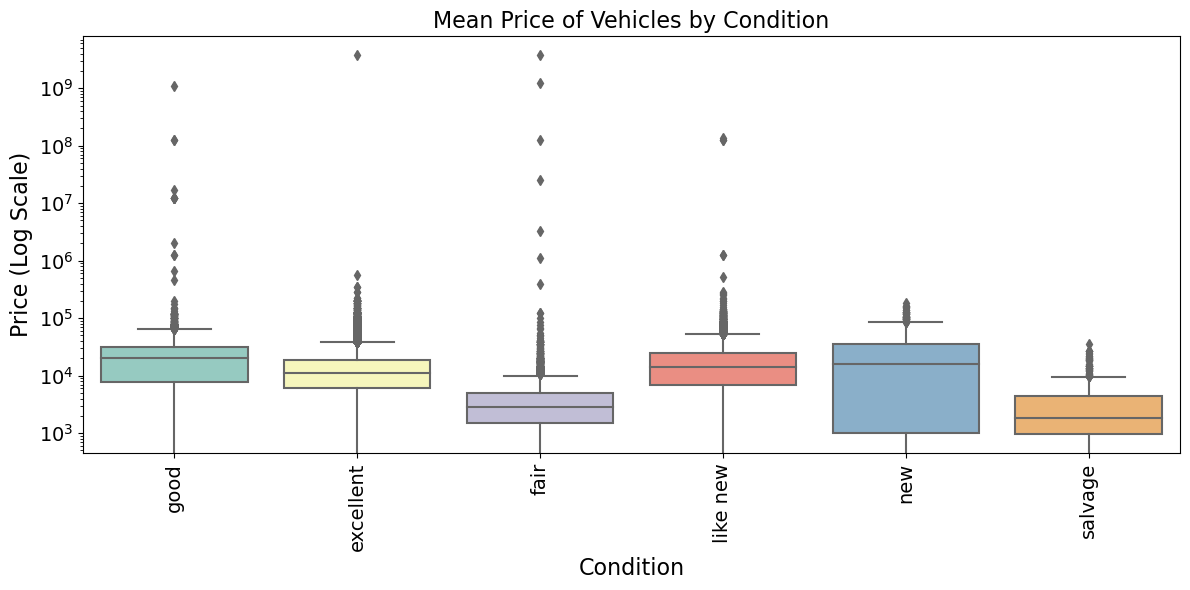

In [13]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create a box plot
splot = sns.boxplot(data=uc, x='condition', y='price', palette='Set3')

# Set y-axis to log scale
splot.set(yscale='log')

# Set plot title and labels
plt.title('Mean Price of Vehicles by Condition', fontsize=16)
plt.xlabel('Condition', fontsize=16)
plt.ylabel('Price (Log Scale)', fontsize=16)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
# Show the plot
plt.tight_layout()
plt.savefig("images/vehicles_price_by_condition.png")
plt.show()

#### Observations:
    - Mean Price of Vehicles by Condition contains more outliers.

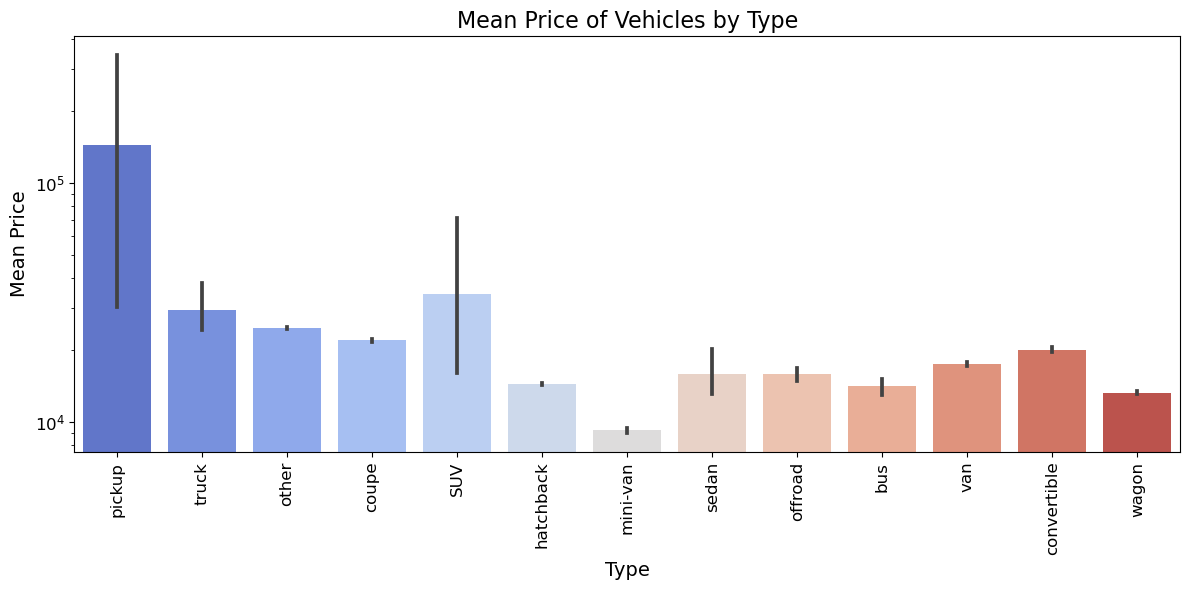

In [14]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create a bar plot
splot = sns.barplot(data=uc, x='type', y='price', palette='coolwarm')

# Set plot title and labels
plt.title('Mean Price of Vehicles by Type', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Mean Price', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.yscale('log')  # Set y-axis to log scale for better visualization

# Show the plot
plt.tight_layout()
plt.savefig("images/vehicles_price_by_type.png")
plt.show()

#### Observations:
    - Pickup vehicle stands out with the highest average log price, suggesting that they tend to command higher prices compared to other types of vehicles.
    - Minivans exhibit the lowest average price, indicating that vehicles in this category are generally more affordable on average.

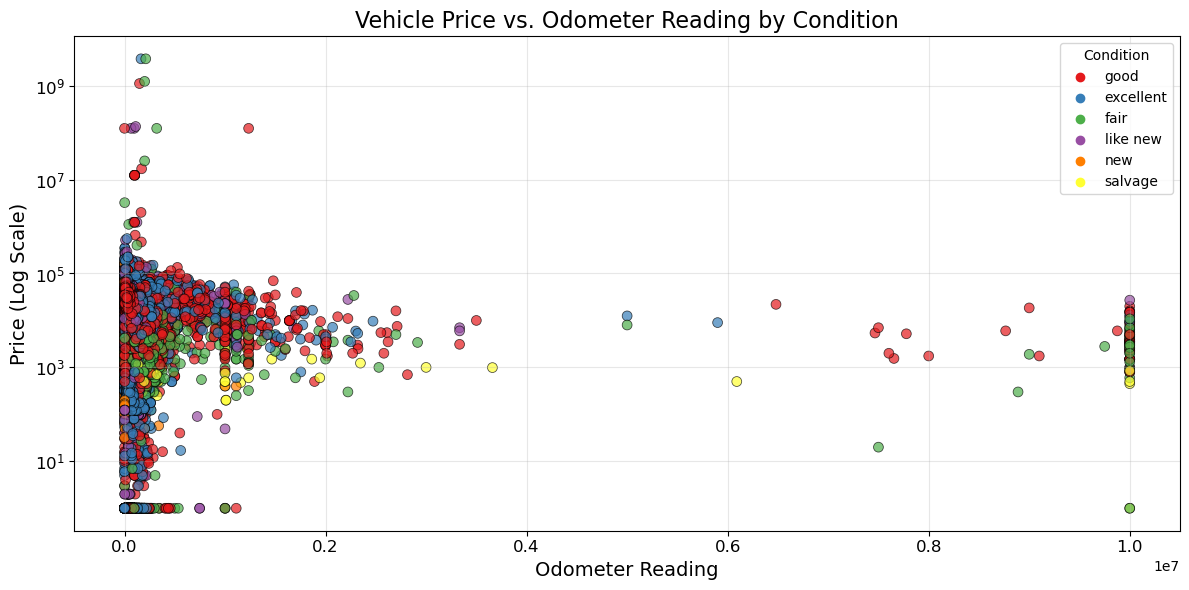

In [15]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create a scatter plot with color palette based on a categorical variable (e.g., 'condition')
splot = sns.scatterplot(data=uc, x='odometer', y='price', hue='condition', palette='Set1', alpha=0.7, edgecolor='black', s=50)

# Set y-axis to log scale
splot.set(yscale='log')

# Set plot title and labels
plt.title('Vehicle Price vs. Odometer Reading by Condition', fontsize=16)
plt.xlabel('Odometer Reading', fontsize=14)
plt.ylabel('Price (Log Scale)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding grid lines
plt.grid(True, alpha=0.3)

# Adding a legend
plt.legend(title='Condition')

# Show the plot
plt.tight_layout()
plt.savefig("images/vehicles_price_vs_odometer_by_condition.png")
plt.show()

#### Observations:
    - Vehicles with higher odometer readings tend to have lower prices, indicating that mileage contributes to 
      lower valuations.
    - Vehicles listed in "new" condition have higher prices.
    - Vehicles with a "salvage" condition tend to have lower prices.
    - Vehicles in "good" and "fair" conditions show a wide range of prices.
    - Vehicles in "excellent" and "like new" conditions tend to have higher prices.

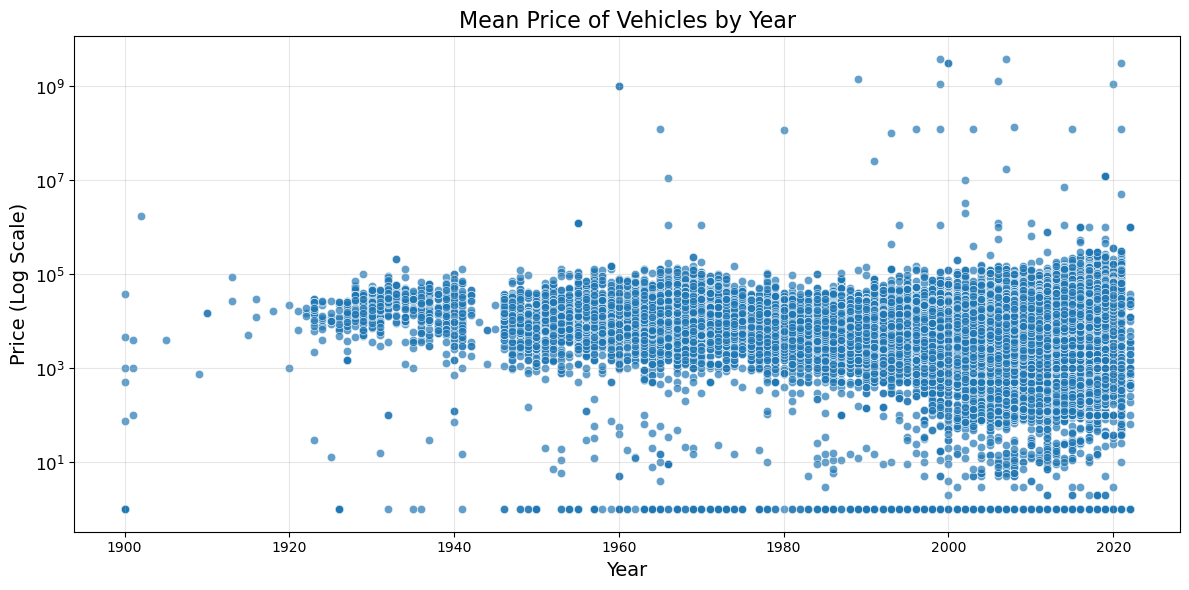

In [16]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create a scatter plot
splot = sns.scatterplot(data=uc, x='year', y='price', alpha=0.7)

# Set y-axis to log scale
splot.set(yscale='log')

# Set plot title and labels
plt.title('Mean Price of Vehicles by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price (Log Scale)', fontsize=14)
plt.yticks(fontsize=12)

# Adding grid lines
plt.grid(True, alpha=0.3)

# Show the plot
plt.tight_layout()
plt.savefig("images/vehicles_price_by_year.png")
plt.show()

#### Observations:
    - There is a negative correlation between the price of a car and the year it was produced. This means that older cars tend to be less expensive than newer cars. 
    - However, there are some outliers, such as cars that are very old but still have a high price. 

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [17]:
# Make a copy of the data before modifying the original dataset.
uc_df = uc.copy()

In [18]:
def fill_column_values_with_group(df, grouped_columns, fill_columns):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        for col in fill_columns:
            mode_fill = df.groupby(grouped_columns)[col].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
            df[col] = df[col].fillna(mode_fill)
    return df

In [19]:
# Group by relevant columns and fill missing values using transform
grouped_columns = ['year', 'manufacturer', 'model']
fill_columns = ['cylinders', 'fuel', 'transmission', 'type']

# Group by relevant columns and fill missing values using transform 
uc_df = fill_column_values_with_group(uc_df, grouped_columns, fill_columns)
print_nan_percent(uc_df)

Columns with null (NaN) values percentage:
year: 0.28%
manufacturer: 4.13%
model: 1.24%
condition: 40.79%
cylinders: 14.46%
fuel: 0.44%
odometer: 1.03%
title_status: 1.93%
transmission: 0.11%
VIN: 37.73%
drive: 30.59%
size: 71.77%
type: 5.59%
paint_color: 30.50%


In [20]:
# Group by relevant columns and fill missing values using transform 
grouped_columns = ['year', 'manufacturer']
fill_columns = ['cylinders', 'drive', 'type']

uc_df = fill_column_values_with_group(uc_df, grouped_columns, fill_columns)

In [21]:
# Group by relevant columns and fill missing values using transform 
grouped_columns = ['year', 'model']
fill_columns = ['cylinders', 'fuel', 'transmission', 'drive', 'size', 'type']

uc_df = fill_column_values_with_group(uc_df, grouped_columns, fill_columns)
print_nan_percent(uc_df)

Columns with null (NaN) values percentage:
year: 0.28%
manufacturer: 4.13%
model: 1.24%
condition: 40.79%
cylinders: 1.62%
fuel: 0.43%
odometer: 1.03%
title_status: 1.93%
transmission: 0.10%
VIN: 37.73%
drive: 1.43%
size: 30.36%
type: 1.29%
paint_color: 30.50%


In [22]:
# remove all rows with outliers

# Filter for cars with mileage between 20 and 250K
uc_df = uc_df[uc_df['odometer'].between(20, 250000)]

# Filter for cars with price between 100 and 300K
uc_df = uc_df[uc_df['price'].between(100, 300000)]

# Filter for cars with year between 1900 and 2022
uc_df = uc_df[uc_df['year'].between(1900, 2022)]

In [23]:
# Impute values for the missing data
# Separate categorical and numerical columns
categorical_columns = ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']
numerical_columns = ['price', 'year', 'odometer']

categorical_imputer = SimpleImputer(strategy='most_frequent')
uc_df[categorical_columns] = categorical_imputer.fit_transform(uc_df[categorical_columns])

knn_imputer = KNNImputer(n_neighbors=5)
uc_df[numerical_columns] = knn_imputer.fit_transform(uc_df[numerical_columns])

In [24]:
# 'id' and 'VIN' are auto incremented and unique numbers. It usually doesn't provide valuable insights so dropping them
uc_df = uc_df.drop(columns=['id', 'VIN'])

In [25]:
# Label Encoding converts categorical labels into numerical format, allowing algorithms to process them. 
# Separate categorical columns
categorical_columns = ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']

# Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()
uc_df[categorical_columns] = uc_df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col) + 1)

In [26]:
# Convert year column type to integer
uc_df["year"] = uc_df["year"].astype("int64")

In [27]:
# Handle 0 values in columns with median value
# Create a list of zero formats
zero_formats = ['0', '00', '000', '0000', '00000', '000000']
columns = ['price', 'odometer']

# Replace the zero formats with median values
for column in columns:
    median = uc_df[column].median()
    uc_df[column] = uc_df[column].apply(lambda x: median if str(x) in zero_formats else x)

# Print the number of occurrences of zero formats in each column
print(uc_df.applymap(lambda x: str(x) in zero_formats).sum())

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64


In [28]:
# Next, we can find correlation in numerical features
corr_matrix = uc_df.corr(numeric_only=True)
corr_matrix

region     price      year  manufacturer     model  condition  \
region        1.000000 -0.014625 -0.006194      0.000348 -0.000945  -0.015517   
price        -0.014625  1.000000  0.338078     -0.049531  0.015202   0.138521   
year         -0.006194  0.338078  1.000000      0.039972  0.057717   0.102594   
manufacturer  0.000348 -0.049531  0.039972      1.000000 -0.000446  -0.016141   
model        -0.000945  0.015202  0.057717     -0.000446  1.000000   0.000608   
condition    -0.015517  0.138521  0.102594     -0.016141  0.000608   1.000000   
cylinders    -0.005418  0.264357 -0.152691     -0.214858  0.051491   0.027348   
fuel         -0.006741 -0.065246  0.100428     -0.020583  0.071693   0.080594   
odometer      0.010250 -0.518843 -0.323215      0.031018 -0.001255  -0.152224   
title_status -0.008079 -0.085896 -0.011953      0.016266 -0.013231  -0.013201   
transmission -0.015257  0.241965  0.157636     -0.000699  0.018170   0.175920   
drive         0.014496 -0.112200 -0.188406     -0.064701 -0.116240  -0.000759   
size         -0.003020 -0.058758 -0.004541      0.010925  0.004608  -0.031686   
type          0.000803  0.052091  0.024917      0.042541 -0.126010   0.032989   
paint_color   0.001665 -0.013569 -0.016873      0.005905 -0.002985   0.017023   
state        -0.039446  0.013601  0.011644     -0.012523  0.003790   0.032745   

              cylinders      fuel  odometer  title_status  transmission  \
region        -0.005418 -0.006741  0.010250     -0.008079     -0.015257   
price          0.264357 -0.065246 -0.518843     -0.085896      0.241965   
year          -0.152691  0.100428 -0.323215     -0.011953      0.157636   
manufacturer  -0.214858 -0.020583  0.031018      0.016266     -0.000699   
model          0.051491  0.071693 -0.001255     -0.013231      0.018170   
condition      0.027348  0.080594 -0.152224     -0.013201      0.175920   
cylinders      1.000000 -0.108307  0.071437     -0.047749     -0.000760   
fuel          -0.108307  1.000000 -0.188832     -0.014486      0.284677   
odometer       0.071437 -0.188832  1.000000     -0.001110     -0.405052   
title_status  -0.047749 -0.014486 -0.001110      1.000000     -0.061000   
transmission  -0.000760  0.284677 -0.405052     -0.061000      1.000000   
drive         -0.086410  0.074492 -0.089730      0.004974      0.087766   
size          -0.029597  0.000112  0.042608      0.004338     -0.077108   
type           0.029030 -0.087684 -0.010639      0.004840      0.026882   
paint_color    0.034418 -0.061376  0.037726     -0.008653     -0.052206   
state          0.023132 -0.025350  0.006131      0.003618     -0.006141   

                 drive      size      type  paint_color     state  
region        0.014496 -0.003020  0.000803     0.001665 -0.039446  
price        -0.112200 -0.058758  0.052091    -0.013569  0.013601  
year         -0.188406 -0.004541  0.024917    -0.016873  0.011644  
manufacturer -0.064701  0.010925  0.042541     0.005905 -0.012523  
model        -0.116240  0.004608 -0.126010    -0.002985  0.003790  
condition    -0.000759 -0.031686  0.032989     0.017023  0.032745  
cylinders    -0.086410 -0.029597  0.029030     0.034418  0.023132  
fuel          0.074492  0.000112 -0.087684    -0.061376 -0.025350  
odometer     -0.089730  0.042608 -0.010639     0.037726  0.006131  
title_status  0.004974  0.004338  0.004840    -0.008653  0.003618  
transmission  0.087766 -0.077108  0.026882    -0.052206 -0.006141  
drive         1.000000 -0.016476  0.080700    -0.020150 -0.050025  
size         -0.016476  1.000000 -0.104823    -0.015964  0.006434  
type          0.080700 -0.104823  1.000000     0.046127 -0.006112  
paint_color  -0.020150 -0.015964  0.046127     1.000000 -0.012509  
state        -0.050025  0.006434 -0.006112    -0.012509  1.000000

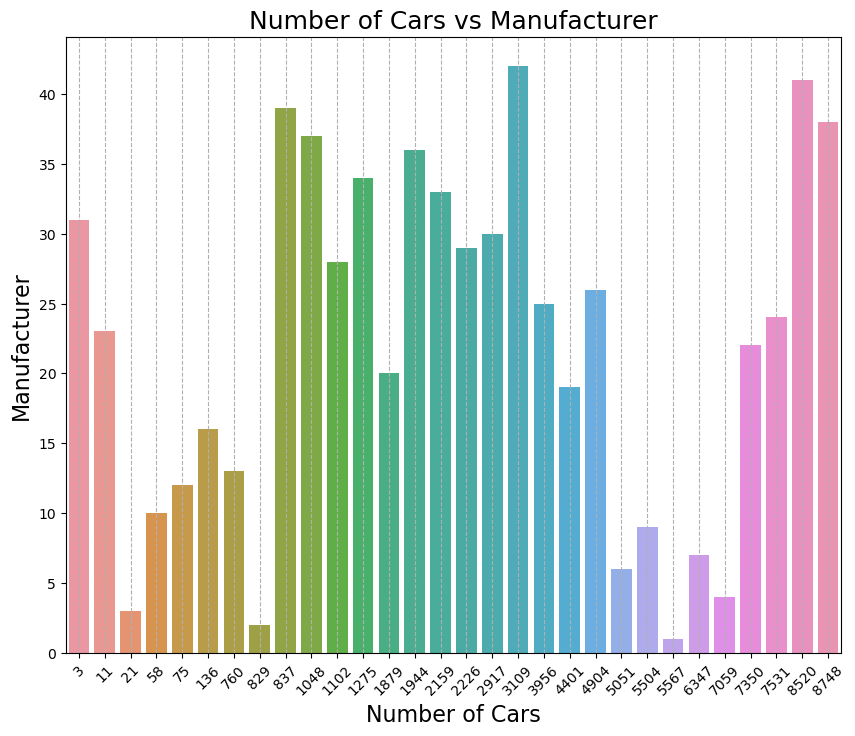

In [29]:
uc_df_tmp = uc_df['manufacturer'].value_counts().sort_values()
fig, ax = plt.subplots(figsize=(10, 8))

# Remove extra bars because car chart can not show more than 30 bars properly
uc_df_tmp = uc_df_tmp.head(30)

# Create a bar chart of the number of cars for each manufacturer
ax = sns.barplot(x=uc_df_tmp.values, y=uc_df_tmp.index)

# Rotate x labels to prevent overlapping
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel("Number of Cars", fontsize=16)
plt.ylabel("Manufacturer", fontsize=16)
plt.title("Number of Cars vs Manufacturer", fontsize=18)

# Customize grid
plt.grid(axis='x', linestyle='--')
plt.savefig("images/number_of_cars_vs_manufacturer.png")
plt.show()

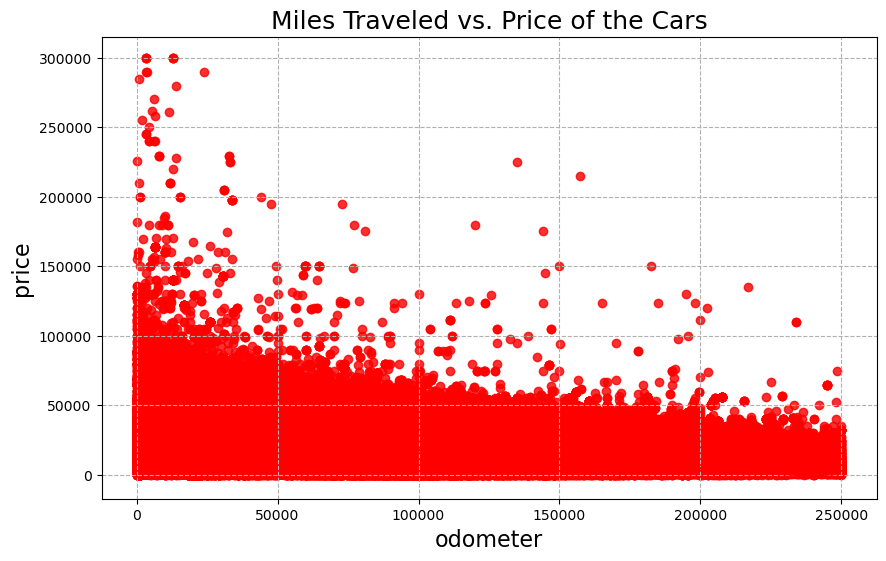

In [30]:
# Create Scatterplot for the miles travelled vs price of the cars
data_price_year_mileage = uc_df[['price', 'year', 'odometer']]

# Create a scatter plot of price vs. mileage
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="odometer",
    y="price",
    data=data_price_year_mileage,
    alpha=0.3,
    color="skyblue"
)
# Add labels and title
plt.xlabel("Odometer", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.title("Miles Traveled vs. Price of the Cars", fontsize=18)

# Customize grid
plt.grid(axis='x', linestyle='--')
plt.grid(axis='y', linestyle='--')

# Add a linear regression line
sns.regplot(
    x="odometer",
    y="price",
    data=data_price_year_mileage,
    color="red",
    fit_reg=True,
    line_kws={'linewidth':2}
)
plt.savefig("images/miles_travelled_vs_price_of_car.png")
plt.show()

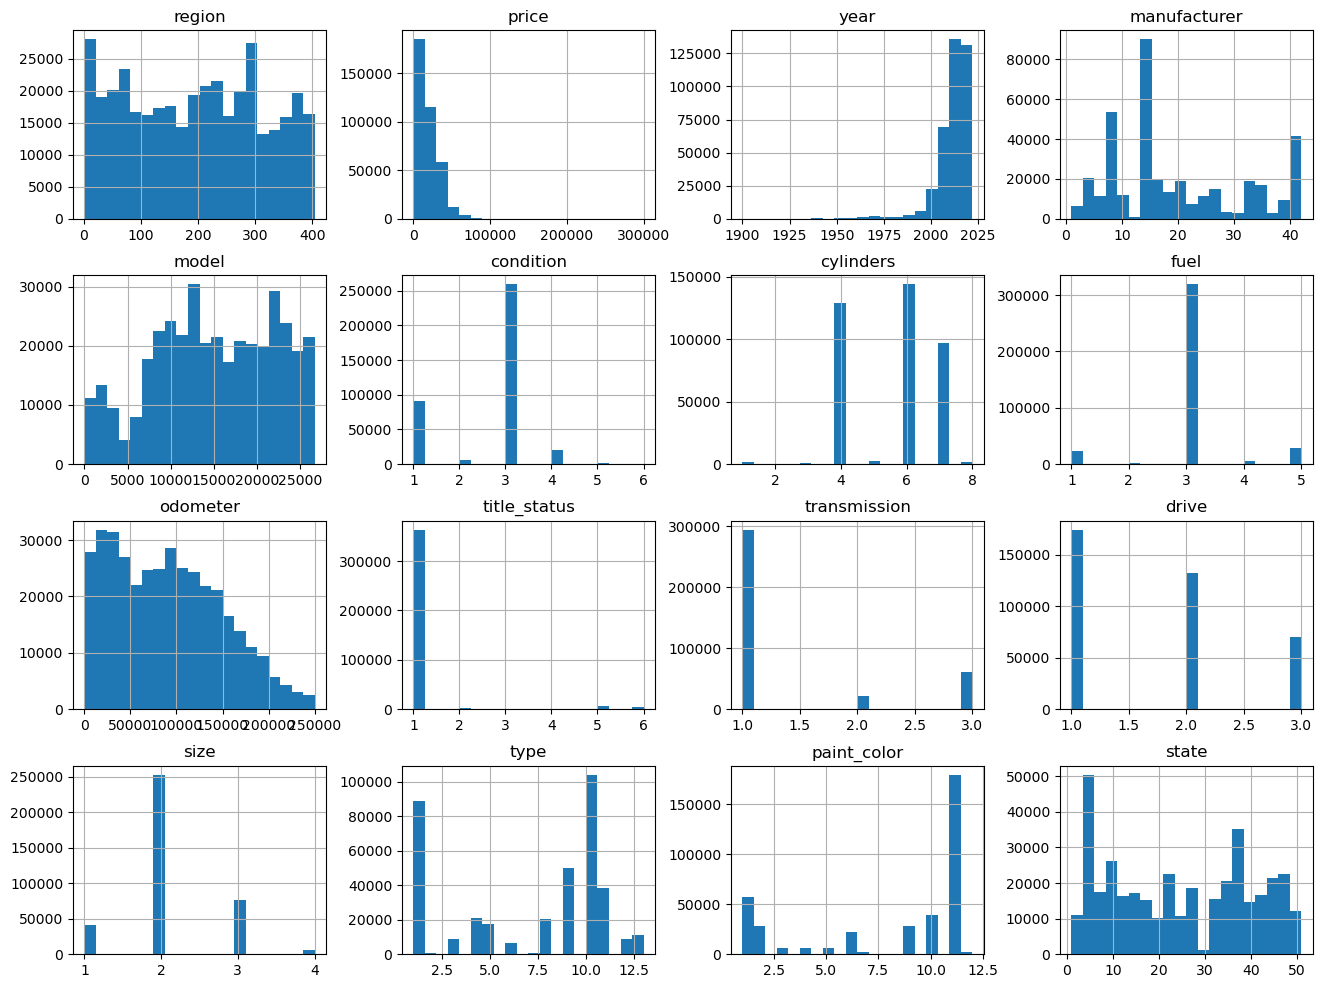

In [31]:
# Create histogram on all the columns
uc_df.hist(bins=20, figsize = (16, 12))
plt.savefig("images/hist_plot.png")
# Show the plot
plt.show()

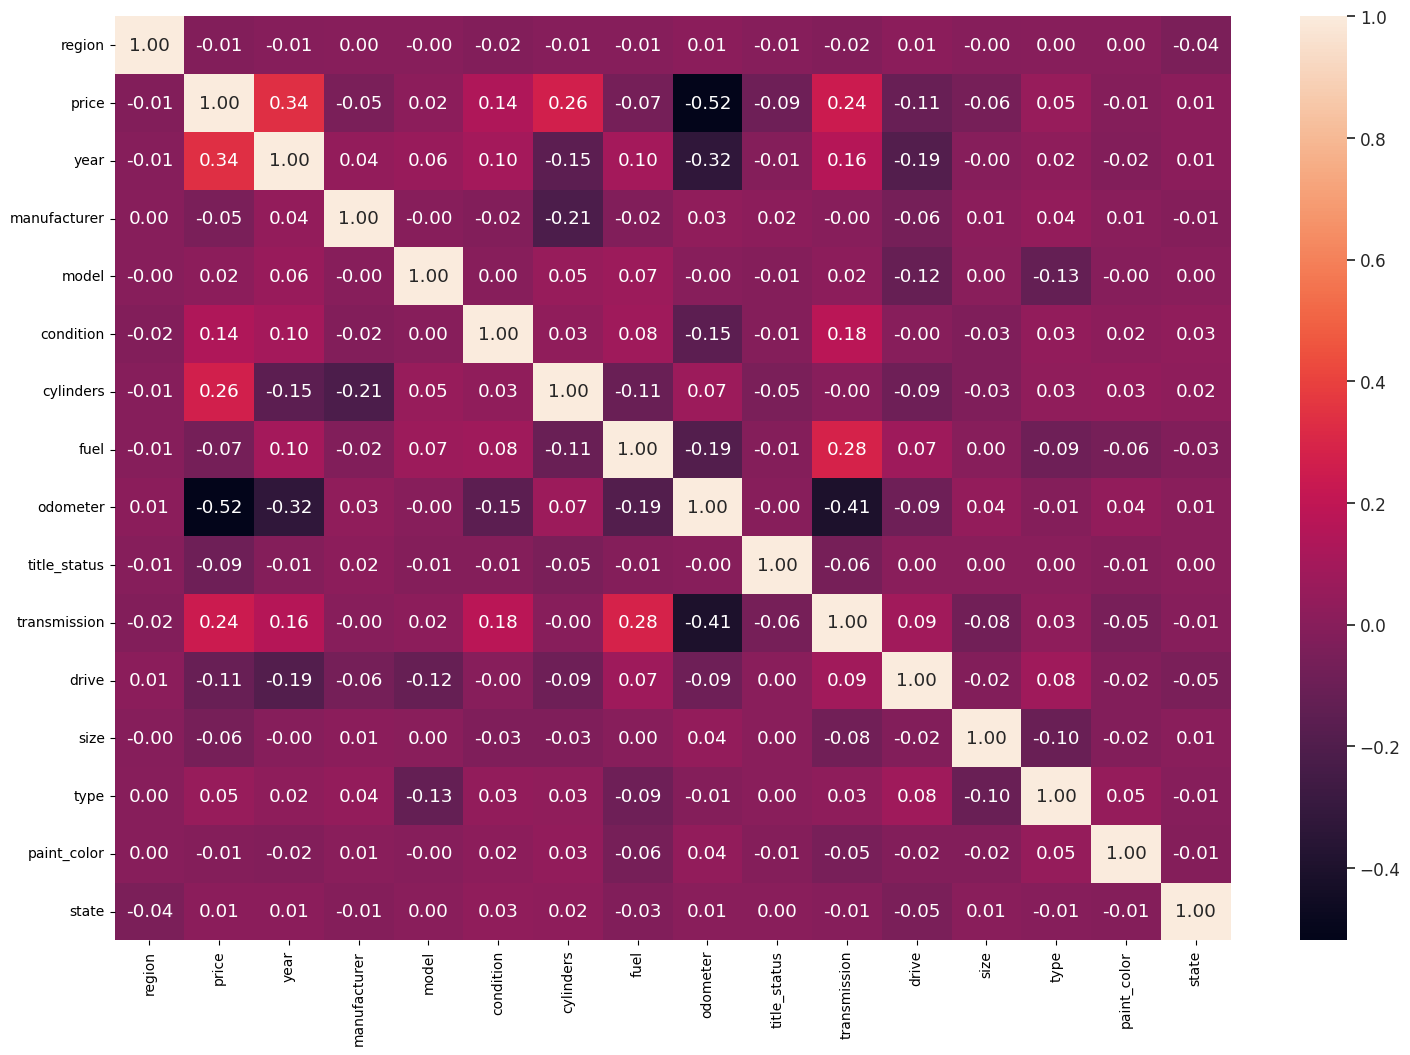

In [32]:
# Heatmap of all converted numerical features
plt.subplots(figsize=(18,12))
sns.set(font_scale=1.1)
sns.heatmap(uc_df.corr(numeric_only=True), annot=True, fmt='.2f')
plt.savefig("images/heatmap_after_data_cleaning.png")

#### Observations:
   - The price of a used car is positively correlated with the year of the car. This means that newer cars tend to be more expensive than older cars.
   - The price of a used car is negatively correlated with the mileage of the car. This means that cars with lower mileage tend to be more expensive than cars with higher mileage.
   - The price of a used car is also correlated with the brand and model of the car. Some brands and models are generally more expensive than others

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [33]:
# split data
X, y = uc_df.drop(columns='price'), uc_df['price']
random_state = 42
test_size = 0.2
train_size = 0.7
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state, train_size=train_size, test_size = test_size)

In [34]:
# Calculate VIF for each predictor variable
def vif(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Feature', 'VIF'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'VIF', axis=0, ascending=False, inplace=False)
 
# Calculating Vif value
vif(input_data=uc_df, dependent_col="price")

Feature     VIF
1           year  104.39
5      cylinders   22.26
6           fuel   19.73
11          size   13.93
4      condition    9.06
10         drive    6.46
9   transmission    5.76
3          model    5.70
13   paint_color    4.94
12          type    4.33
2   manufacturer    4.12
7       odometer    4.10
0         region    3.73
14         state    3.68
8   title_status    3.42

#### Observations:
   - **High VIF (> 5):**
        'cylinders', 'fuel', 'size', 'year', 'drive', 'transmission', 'model' : These variables have relatively high VIF values, suggesting strong multicollinearity with other variables in the dataset. This might indicate that these variables are highly correlated with one another, which could affect the stability and interpretability of a regression model.

   - **Moderate VIF (3 to 5):**
        'paint_color', 'odometer', 'region', 'manufacturer', 'state', 'type', 'title_status': These variables have moderate VIF values, indicating some degree of multicollinearity. While not as severe as high VIF values, it's still worth considering their correlations and potential impact on the model.

In [35]:
def column_importance(X, y, X_train, X_test, y_train, y_test):
        
    # Create the column transformer
    preprocessor = make_column_transformer(
        (OneHotEncoder(drop='if_binary'), X.select_dtypes(exclude=np.number).columns),
        remainder=StandardScaler(with_mean=False)
    )
    
    # Create the pipeline
    pipe = make_pipeline(preprocessor, StandardScaler(with_mean=False), Ridge(alpha=0.01))
    
    # Fit the model with training set
    model = pipe.fit(X_train, y_train)
    
    # Evaluate model
    test_r2 = model.score(X_test, y_test)
    print('Model R^2:', test_r2)
    
    # Calculate permutation importance
    r = permutation_importance(model, X_test, y_test, n_repeats=50, random_state=random_state)
    
    # Create a DataFrame of column importance
    importance_df = pd.DataFrame({"Column": X.columns, "Importance": r.importances_mean})
    importance_df = importance_df.sort_values(by="Importance", ascending=False)
    
    return model, test_r2, importance_df

# Example usage
model, test_r2, importance_df = column_importance(X, y, X_train, X_test, y_train, y_test)

importance_df

Model R^2: 0.4401993380481696


Column  Importance
7       odometer    0.457585
5      cylinders    0.183679
1           year    0.092241
6           fuel    0.047008
10         drive    0.013706
8   title_status    0.009281
9   transmission    0.005359
4      condition    0.002322
11          size    0.000956
12          type    0.000760
2   manufacturer    0.000498
13   paint_color    0.000366
3          model    0.000279
0         region    0.000081
14         state    0.000005

#### Observations:
   - **High Positive Importance:**
        'odometer', 'cylinders', 'year', 'fuel', 'drive': These columns have positive permutation importance values, suggesting that shuffling their values significantly decreases the model's performance. These features are considered important for the model's predictions.

   - **Low Positive Importance:**
        'title_status', 'transmission', 'condition' : These columns have relatively lower positive permutation importance values. While they still contribute to the model's performance, their importance might be somewhat lower compared to the columns with higher positive importance.

   - **Low to Negative Importance:**
        'size', 'type', 'manufacturer', 'paint_color', 'model', 'region', 'state': These columns have importance values ranging from low to negative. Negative values indicate that shuffling these feature values actually improves the model's performance. This could imply that these features might not carry strong predictive power in the current model.   

In [36]:
# Decide on complexity of the model
def polynomial_regression(X, y, max_degree):
    train_mses = []
    test_mses = []
    categorical_features = X.select_dtypes(exclude=np.number).columns
    numerical_features = X.select_dtypes(include=np.number).columns
   
    for d in range(1, max_degree + 1):
        # Create pipeline with PolynomialFeatures degree d
        ohe_step = make_column_transformer(
            (OneHotEncoder(drop='if_binary'), categorical_features),
            (StandardScaler(with_mean=False), numerical_features)
        )

        pipe = Pipeline([
            ('transformer', ohe_step),
            ('polyfeatures', PolynomialFeatures(degree=d, include_bias=False)),
            ('scaler', StandardScaler(with_mean=False)),
            ('linreg', LinearRegression())
        ])

        # Fit on train
        pipe.fit(X_train, y_train)

        # Compute mean squared errors
        train_mses.append(mean_squared_error(y_train, pipe.predict(X_train)))
        test_mses.append(mean_squared_error(y_test, pipe.predict(X_test)))

    return train_mses, test_mses

# Usage
max_degree = 3

train_mses, test_mses = polynomial_regression(X_train, X_test, max_degree)

print("Train MSEs:", train_mses)
print("Test MSEs:", test_mses)

Train MSEs: [125660504.97044647, 88060153.66441303, 74799363.99528864]
Test MSEs: [129209591.15793417, 91279785.54788978, 78613143.69978762]


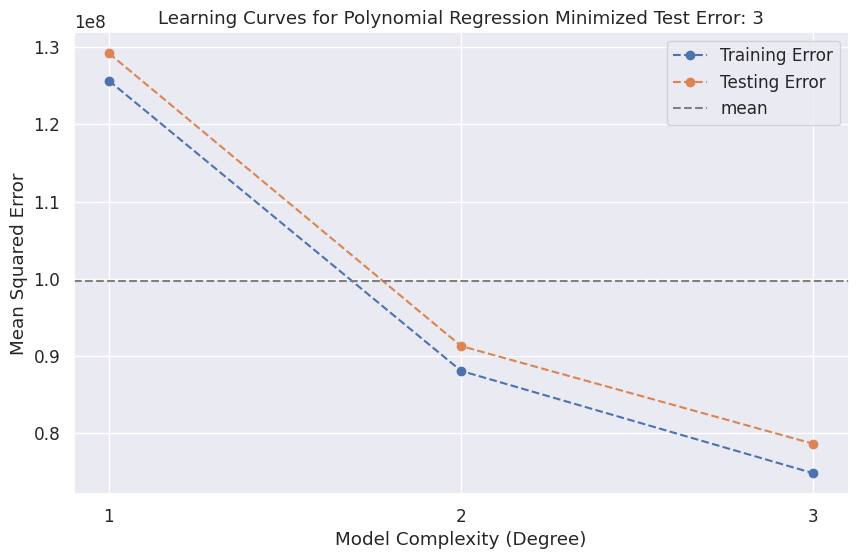

In [37]:
# Visualize the effectiveness of complexity
complexity = max_degree + 1
plt.figure(figsize=(10, 6))
plt.plot(range(1, complexity), train_mses, '--o', label='Training Error')
plt.plot(range(1, complexity), test_mses, '--o', label='Testing Error')
plt.axhline(y=np.mean(test_mses), color='gray', linestyle='--', label='mean')
plt.xticks(range(1, complexity))
plt.xlabel('Model Complexity (Degree)')
plt.ylabel('Mean Squared Error')
#plt.title('Learning Curves for Polynomial Regression')
plt.title(f'Learning Curves for Polynomial Regression Minimized Test Error: {test_mses.index(min(test_mses)) + 1}')
plt.legend()
plt.savefig("images/ploynomial_degree.png")
plt.show()

#### Observations:
   - Best complex degree was 3

In [38]:
# Use GridSearchCV to find out best alpha for Ridge Model using Transformed Target Regressor
# Define the range of alpha values to explore
alphas = [0.001, 0.01, 0.1, 0.5, 1.0, 10.0]

# Best Complex Degree
best_degree = 3

#### Finding Best Alpha

In [39]:
# Define the column transformer
features = X_train.select_dtypes(exclude=np.number).columns
ohe_step = make_column_transformer((OneHotEncoder(drop='if_binary'), features), 
                                   remainder=StandardScaler(with_mean=False))

# Create the pipeline
pipe = Pipeline([
    ('transformer', ohe_step),
    ('polyfeatures', PolynomialFeatures(degree=best_degree, include_bias=False)),
    ('scaler', StandardScaler(with_mean=False)),
    ('ttregressor', TransformedTargetRegressor(func=np.log1p, inverse_func=np.expm1, regressor=Ridge()))
])

# Define parameter grid for GridSearchCV
param_grid = {'ttregressor__regressor__alpha': alphas}

# Create GridSearchCV instance
grid = GridSearchCV(pipe, param_grid=param_grid, scoring='neg_mean_squared_error')

# Fit on training data
grid.fit(X_train, y_train)

# Evaluate the model
train_mse = mean_squared_error(y_train, grid.predict(X_train))
test_mse = mean_squared_error(y_test, grid.predict(X_test))
best_alpha = grid.best_params_['ttregressor__regressor__alpha']

# Result
print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Best_Alpha: ', best_alpha)
print('Best Estimator Results:', grid.best_estimator_)

Train MSE: 94716417.69226499
Test MSE: 98597055.75035772
Best_Alpha:  10.0
Best Estimator Results: Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(with_mean=False),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  Index([], dtype='object'))])),
                ('polyfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler(with_mean=False)),
                ('ttregressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=Ridge(alpha=10.0)))])


#### Ridge Model with Best Degree and Alpha

In [40]:
# Make best degree as baseline
# Define the features to consider
features = X_train.select_dtypes(exclude=np.number).columns

# Define the column transformer
ohe_step = make_column_transformer((OneHotEncoder(drop='if_binary'), features), remainder="passthrough")

# Create the pipeline using make_pipeline
pipe = make_pipeline(
    ohe_step,
    PolynomialFeatures(degree=best_degree, include_bias=True),
    StandardScaler(with_mean=False),
    TransformedTargetRegressor(func=np.log1p, inverse_func=np.expm1, regressor=Ridge(alpha=best_alpha))
)

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Evaluate the model
train_mse = mean_squared_error(y_train, pipe.predict(X_train))
test_mse = mean_squared_error(y_test, pipe.predict(X_test))
train_mae = mean_absolute_error(y_train, pipe.predict(X_train))
test_mae = mean_absolute_error(y_test, pipe.predict(X_test))
score = pipe.score(X_test, y_test)

# Results
print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAE:', train_mae)
print('Test MAE:', test_mae)
print('Score:', score)

Train MSE: 94716417.7519783
Test MSE: 98597055.80896643
Train MAE: 5733.881414807669
Test MAE: 5770.8968882196
Score: 0.5728281729398406


In [41]:
# get all transformed feature names
transformed_features = pipe.named_steps['columntransformer'].get_feature_names_out(X_train.columns)

# remove 'onehotencoder' and 'remainder' prefixes for readability
transformed_features = [str.split(x, sep = '__')[1] for x in transformed_features]

In [42]:
# build feature names
feature_names = pipe.named_steps['polynomialfeatures'].get_feature_names_out(transformed_features)

In [43]:
# Build a coefficient DataFrame
coefs = pd.DataFrame(
    pipe.named_steps['transformedtargetregressor'].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names
).sort_values(by='Coefficients', ascending=False)

# Display the coefficients
coefs

Coefficients
year^3                    8.813568
drive                     1.626498
year^2 odometer           1.556280
cylinders^2               1.522732
condition^2               1.500970
...                            ...
year cylinders drive     -1.328000
odometer                 -1.406887
condition^3              -1.495802
year^2 drive             -1.845644
year                     -8.567662

[816 rows x 1 columns]

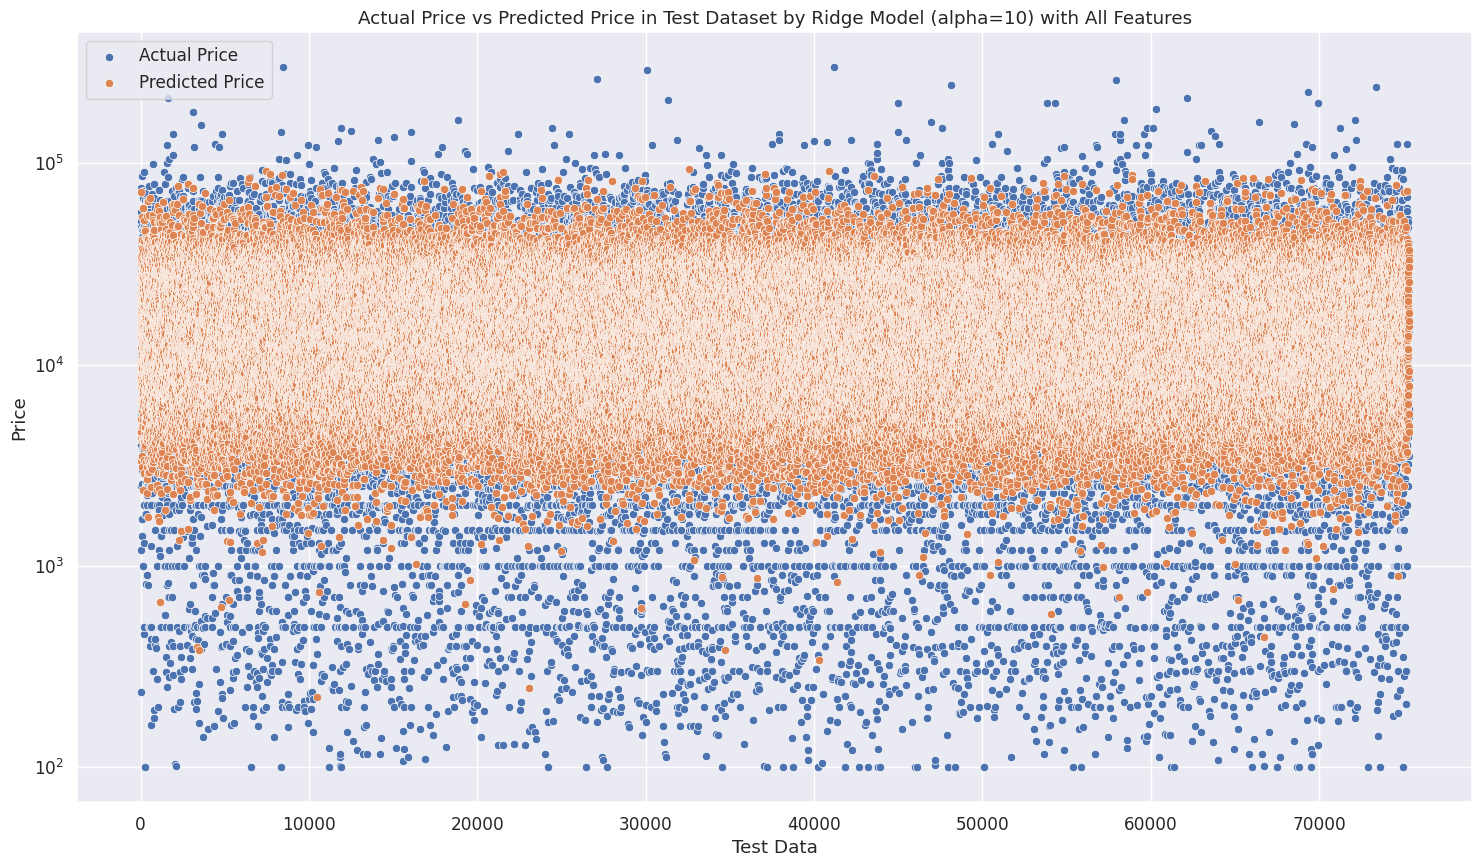

In [44]:
# Visualize predicted results
plt.figure(figsize=(18, 10))
sns.scatterplot(x=range(len(y_test)), y=y_test, label='Actual Price')
sns.scatterplot(x=range(len(y_test)), y=pipe.predict(X_test), label='Predicted Price')
plt.yscale("log")
plt.title('Actual Price vs Predicted Price in Test Dataset by Ridge Model (alpha=10) with All Features')
plt.xlabel('Test Data')
plt.ylabel('Price')
plt.legend()
plt.savefig("images/actual_vs_predicted_price_ridge_alpha_0001_all_features.png")
plt.show()

In [45]:
# 5 Features to use for model prediction
# Selected features list from permuataion importance
features_list=['year','cylinders','odometer','fuel','drive']

#### Ridge Model with Best Degree and Alpha with Top 5 Features

In [46]:
# Ridge Model with best degree and alpha with top 5 features
# Define the column transformer
ohe_step = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), features),
    remainder="passthrough"
)

# Create the pipeline using make_pipeline
pipe = make_pipeline(
    ohe_step,
    PolynomialFeatures(degree=best_degree, include_bias=True),
    StandardScaler(with_mean=False),
    TransformedTargetRegressor(func=np.log1p, inverse_func=np.expm1, regressor=Ridge(alpha=best_alpha))
)

# Fit the pipeline on the training data
pipe.fit(X_train[features_list], y_train)

# Evaluate the model
ridge_train_mse = mean_squared_error(y_train, pipe.predict(X_train[features_list]))
ridge_test_mse = mean_squared_error(y_test, pipe.predict(X_test[features_list]))
ridge_train_mae = mean_absolute_error(y_train, pipe.predict(X_train[features_list]))
ridge_test_mae = mean_absolute_error(y_test, pipe.predict(X_test[features_list]))
score = pipe.score(X_test[features_list], y_test)

# Results
print('Train MSE:', ridge_train_mse)
print('Test MSE:', ridge_test_mse)
print('Train MAE:', ridge_train_mae)
print('Test MAE:', ridge_test_mae)
print('Score:', score)

Train MSE: 100610406.8089636
Test MSE: 103677988.4261065
Train MAE: 6006.518549247128
Test MAE: 6023.532597649099
Score: 0.5508150281108658


In [47]:
# Get all transformed feature names
transformed_features = pipe.named_steps['columntransformer'].get_feature_names_out(features_list)
transformed_features = [feature.split('__', 1)[1] for feature in transformed_features]

# Build feature names
poly_features = pipe.named_steps['polynomialfeatures']
feature_names = poly_features.get_feature_names_out(transformed_features)

# Build a coefficient DataFrame
coefs = pd.DataFrame(
    pipe.named_steps['transformedtargetregressor'].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names
).sort_values(by='Coefficients', ascending=False)

coefs

Coefficients
year^3                        9.288387
year^2 odometer               2.269113
drive                         2.095370
fuel drive                    1.679175
cylinders drive               1.550959
drive^2                       1.458868
cylinders^2                   1.129825
year odometer^2               0.956523
drive^3                       0.870388
fuel^2                        0.856465
cylinders^2 fuel              0.741452
year fuel^2                   0.703594
year cylinders odometer       0.665583
cylinders^2 odometer          0.520806
odometer fuel^2               0.396906
cylinders                     0.395418
year cylinders^2              0.350131
odometer^3                    0.344365
cylinders odometer fuel       0.335008
year odometer fuel            0.292724
year odometer                 0.211578
fuel                          0.170221
year^2                        0.125552
year odometer drive           0.092771
odometer^2 drive              0.083352
odometer^2 fuel               0.061412
odometer drive^2              0.041071
1                             0.000000
cylinders fuel^2             -0.008680
cylinders fuel drive         -0.028212
odometer fuel drive          -0.035392
fuel^2 drive                 -0.046191
cylinders odometer drive     -0.046905
cylinders drive^2            -0.067764
cylinders fuel               -0.105175
cylinders^2 drive            -0.153039
odometer drive               -0.235566
year cylinders               -0.236510
year fuel                    -0.312443
year drive                   -0.348106
cylinders odometer^2         -0.410937
year^2 cylinders             -0.451085
year^2 fuel                  -0.456797
fuel drive^2                 -0.697178
year fuel drive              -0.718209
fuel^3                       -0.837276
year cylinders fuel          -0.894864
cylinders^3                  -0.917641
odometer^2                   -1.226486
cylinders odometer           -1.403277
year cylinders drive         -1.426572
odometer fuel                -1.469451
year drive^2                 -1.482947
odometer                     -1.719958
year^2 drive                 -2.560040
year                         -9.008128

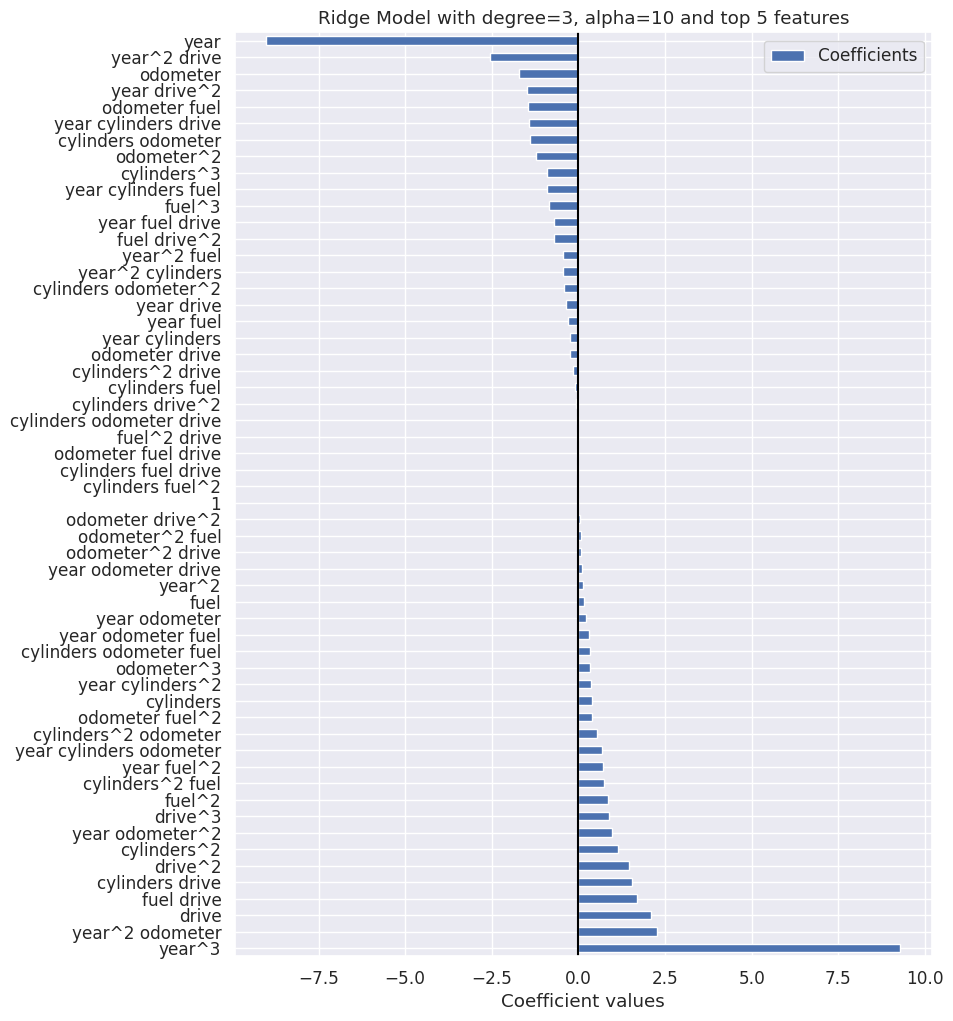

In [48]:
# plot coefficients
coefs.plot.barh(figsize=(9, 12))
plt.title("Ridge Model with degree=3, alpha=10 and top 5 features")
plt.axvline(x=0, color="black")
plt.xlabel("Coefficient values")
plt.savefig("images/coefs_ridge_degree3_alpha10_5features.png")

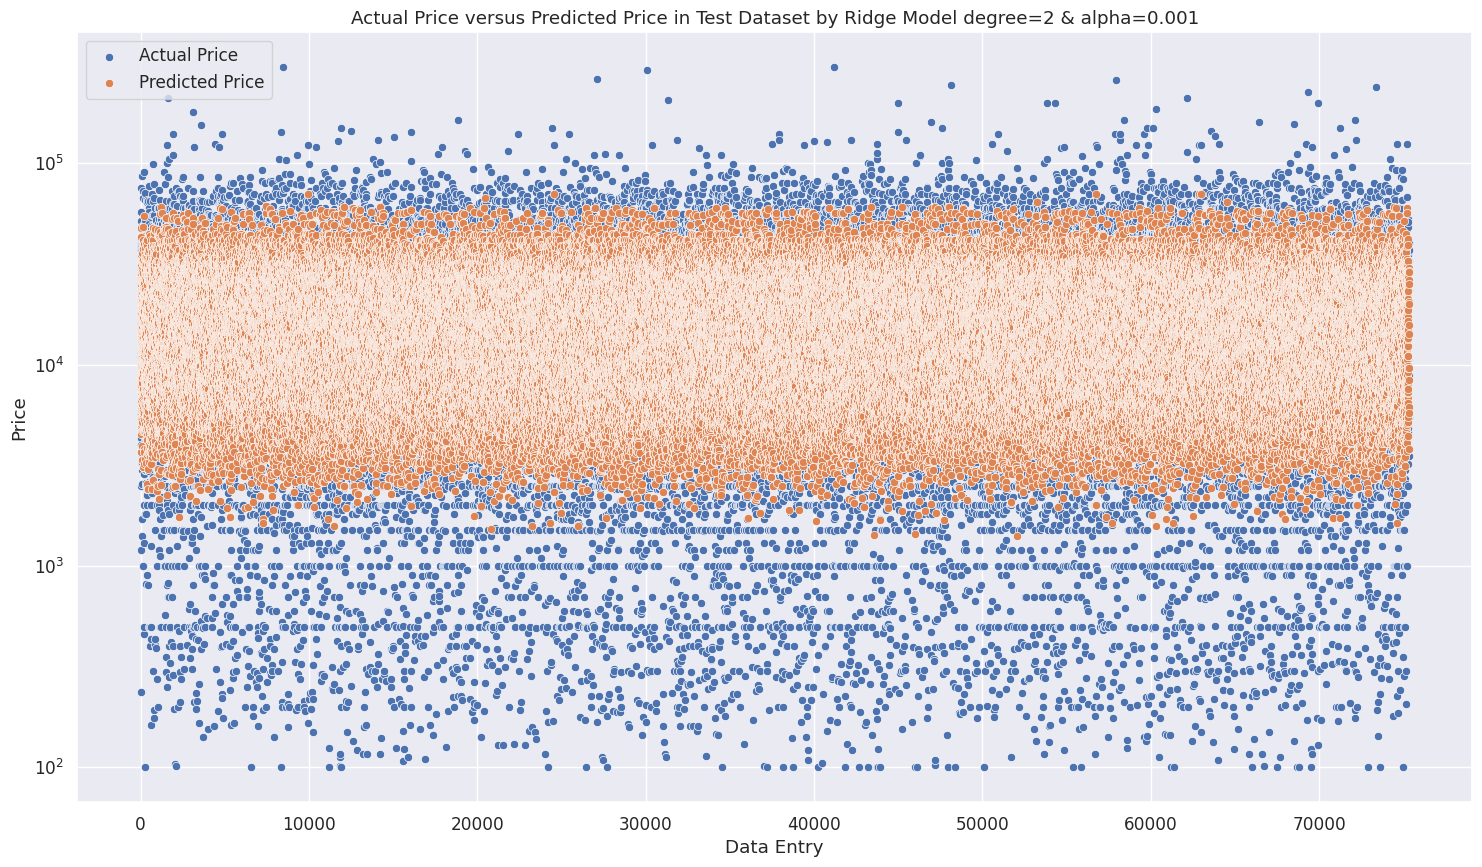

In [49]:
# visualize predicted results
plt.subplots(figsize=(18,10))
splot = sns.scatterplot( x=range(0,len(y_test)), y=y_test, label='Actual Price' )
splot = sns.scatterplot( x=range(0,len(y_test)), y=pipe.predict(X_test[features_list]), label='Predicted Price' )
splot.set(yscale="log")
plt.title('Actual Price versus Predicted Price in Test Dataset by Ridge Model degree=2 & alpha=0.001')
plt.xlabel('Data Entry')
plt.ylabel('Price')
plt.savefig("images/actual_vs_predicted_price_ridge_degree2_alpha_0001_5features.png")
plt.show()

# Model execution performance has increased but also mean squared error has incresed

#### Observations:
    - The MSE, MAE and the Score suggests better model performance. 

### LASSO Model

In [50]:
# Define categorical features
alpha = 0.01
features = X_train[features_list].select_dtypes(exclude=np.number).columns
ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features), remainder="passthrough" )

pipe = Pipeline([('transformer', ohe_step),
                 ('polyfeatures', PolynomialFeatures(degree = best_degree, include_bias = True)),
                 ('scaler', StandardScaler(with_mean=False)),
                 ('ttregressor', TransformedTargetRegressor(func=np.log1p,
                                                            inverse_func=np.expm1,
                                                            regressor=Lasso(alpha = alpha, 
                                                                            random_state = random_state, 
                                                                            max_iter = 2000))) ])
#fit on train
pipe.fit(X_train[features_list], y_train)
lasso_train_mse = mean_squared_error(y_train, pipe.predict(X_train[features_list]))
lasso_test_mse = mean_squared_error(y_test, pipe.predict(X_test[features_list]))
lasso_train_mae = mean_absolute_error(y_train, pipe.predict(X_train[features_list]))
lasso_test_mae = mean_absolute_error(y_test, pipe.predict(X_test[features_list]))

print('Train MSE:', lasso_train_mse)
print('Test MSE :', lasso_test_mse)
print('Train MAE:', lasso_train_mae)
print('Test MAE :', lasso_test_mae)
print('Score    :', pipe.score(X_test[features_list], y_test))

Train MSE: 122637942.28536211
Test MSE : 125754086.78946668
Train MAE: 6865.577019208519
Test MAE : 6886.020246969858
Score    : 0.4551703134197119


In [51]:
# get all transformed feature names
transformed_features = pipe.named_steps['transformer'].get_feature_names_out(X_train[features_list].columns)
# remove 'onehotencoder' and 'remainder' prefixes for readability
transformed_features = [str.split(x, sep = '__')[1] for x in transformed_features]
# build feature names
feature_names = pipe.named_steps['polyfeatures'].get_feature_names_out(transformed_features)

# build a coefficient list to visualize
coefs = pd.DataFrame(
    pipe.named_steps['ttregressor'].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
).sort_values(by='Coefficients', ascending=False)

coefs[coefs['Coefficients'] != 0]

Coefficients
cylinders^3               0.257644
drive^3                   0.255305
year^3                    0.234274
fuel^3                    0.175337
odometer                 -0.019460
year cylinders drive     -0.091278
odometer drive           -0.119003
fuel                     -0.119609
year^2 drive             -0.134365
odometer fuel            -0.315004

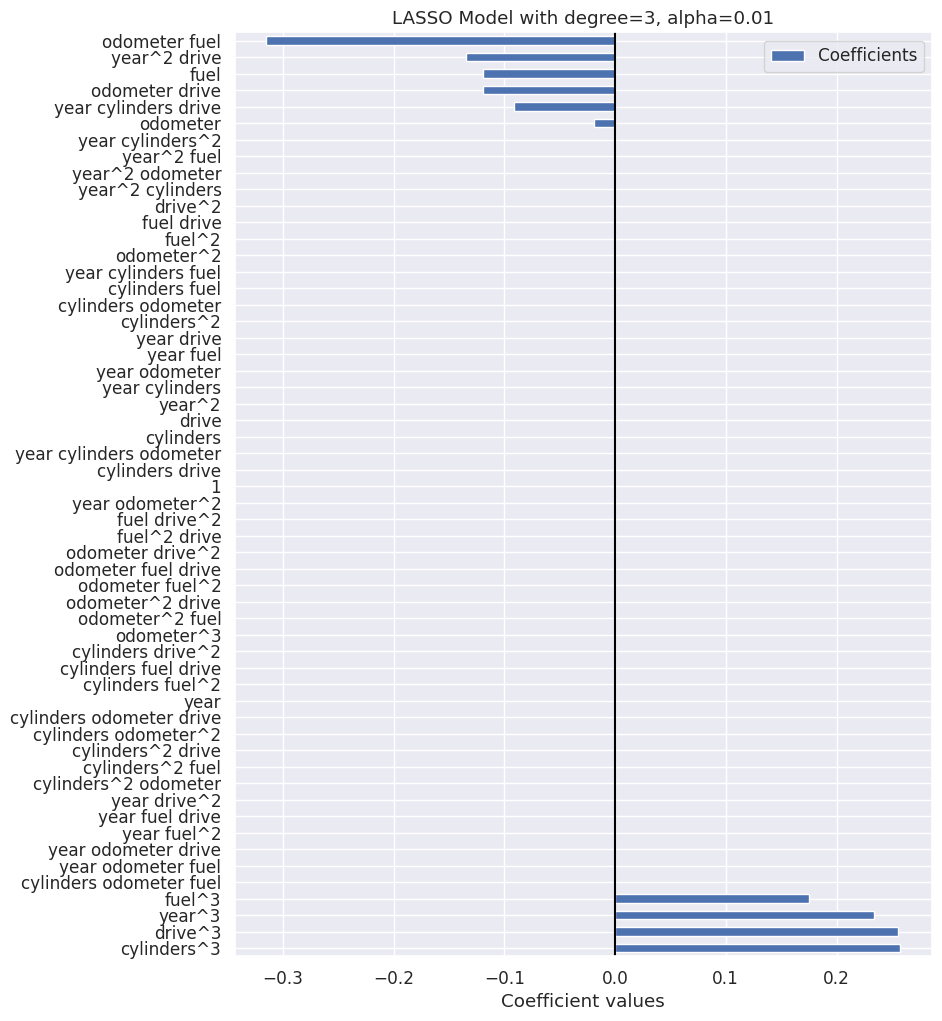

In [52]:
# plot coefficients
coefs.plot.barh(figsize=(9, 12))
plt.title("LASSO Model with degree=3, alpha=0.01")
plt.axvline(x=0, color="black")
plt.xlabel("Coefficient values")
plt.savefig("images/lasso_degree3_alpha_001_5features.png")

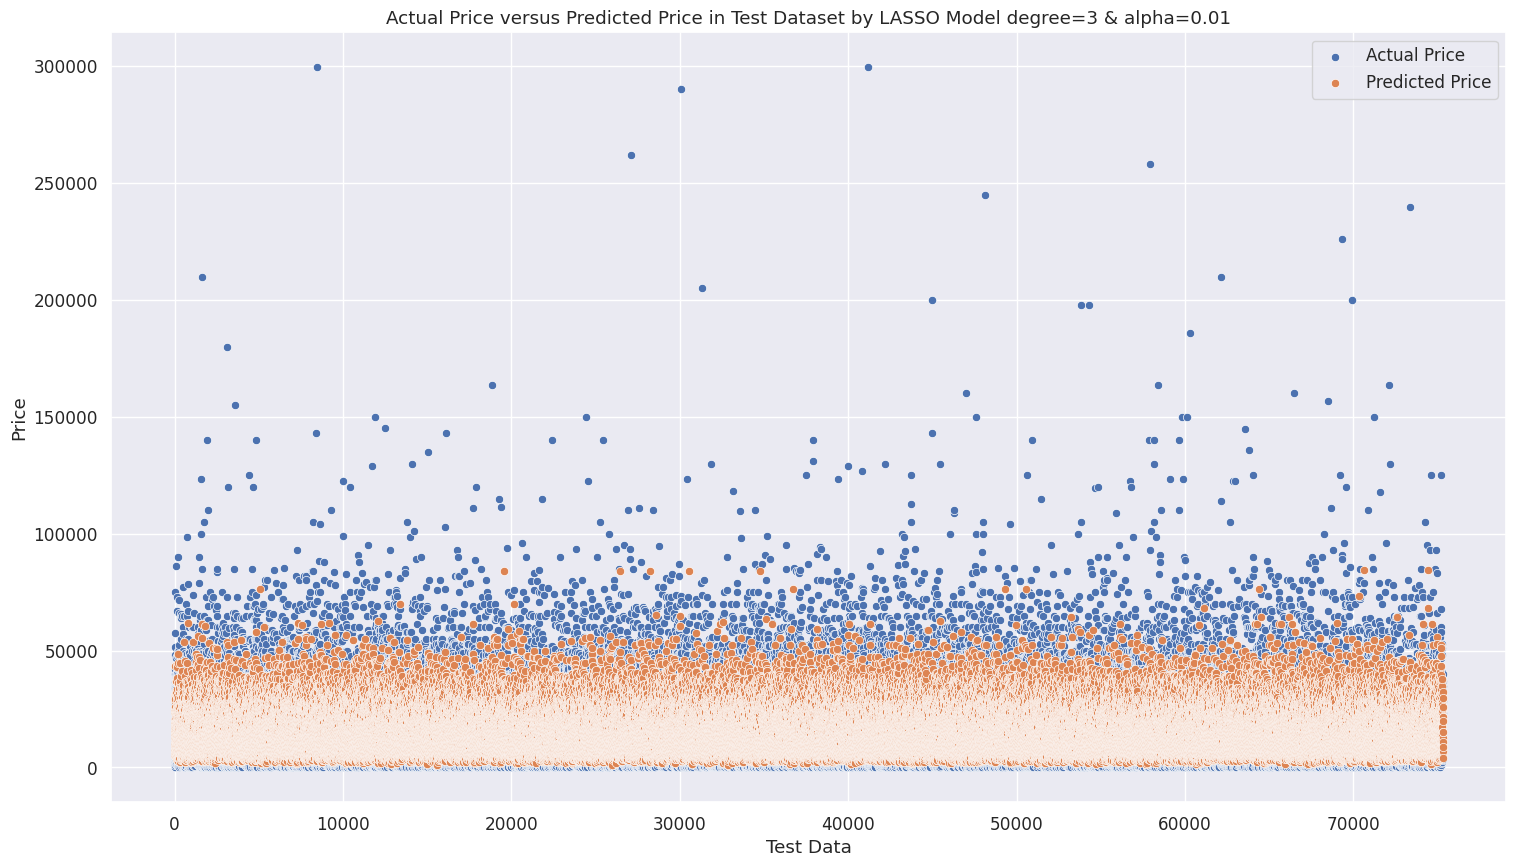

In [53]:
# visualize predicted results
plt.subplots(figsize=(18,10))
splot = sns.scatterplot( x=range(0,len(y_test)), y=y_test, label='Actual Price' )
splot = sns.scatterplot( x=range(0,len(y_test)), y=pipe.predict(X_test[features_list]), label='Predicted Price' )
#splot.set(yscale="log")
plt.title('Actual Price versus Predicted Price in Test Dataset by LASSO Model degree=3 & alpha=0.01')
plt.xlabel('Test Data')
plt.ylabel('Price')
plt.savefig("images/actual_vs_predicted_price_lasso_degree3_alpha_001_5features.png")
plt.show()

### Linear Regression Model

In [54]:
# LinearRegression
features = X_train[features_list].select_dtypes(exclude=np.number).columns
ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features), remainder="passthrough" )

pipe = Pipeline([('transformer', ohe_step),
                 ('polyfeatures', PolynomialFeatures(degree = best_degree, include_bias = True)),
                 ('scaler', StandardScaler(with_mean=False)),
                 ('ttregressor', TransformedTargetRegressor(func=np.log1p,
                                                            inverse_func=np.expm1,
                                                            regressor=LinearRegression())) ])
#fit on train
pipe.fit(X_train[features_list], y_train)
lr_train_mse = mean_squared_error(y_train, pipe.predict(X_train[features_list]))
lr_test_mse = mean_squared_error(y_test, pipe.predict(X_test[features_list]))
lr_train_mae = mean_absolute_error(y_train, pipe.predict(X_train[features_list]))
lr_test_mae = mean_absolute_error(y_test, pipe.predict(X_test[features_list]))

print('Train MSE:', lr_train_mse)
print('Test MSE :', lr_test_mse)
print('Train MAE:', lr_train_mae)
print('Test MAE :', lr_test_mae)
print('Score    :', pipe.score(X_test[features_list], y_test))

Train MSE: 96550126.0992182
Test MSE : 100094895.75442725
Train MAE: 5800.979645096974
Test MAE : 5820.687077718095
Score    : 0.5663387801187618


In [55]:
# get all transformed feature names
transformed_features = pipe.named_steps['transformer'].get_feature_names_out(X_train[features_list].columns)
# remove 'onehotencoder' and 'remainder' prefixes for readability
transformed_features = [str.split(x, sep = '__')[1] for x in transformed_features]
# build feature names
feature_names = pipe.named_steps['polyfeatures'].get_feature_names_out(transformed_features)

# build a coefficient list to visualize
coefs = pd.DataFrame(
    pipe.named_steps['ttregressor'].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
).sort_values(by='Coefficients', ascending=False)

coefs[abs(coefs['Coefficients'])>2]

Coefficients
drive^3                  350101.260878
drive                    307014.492275
year^3                     1557.065031
year                       1494.063867
odometer                    767.160112
year^2 odometer             737.257783
year drive                  650.912857
year fuel                   485.703584
year cylinders              176.887837
cylinders^2                  39.668770
year cylinders odometer      28.546657
fuel drive                   25.359555
cylinders drive              22.195602
year odometer fuel           13.625979
year cylinders fuel           9.336096
fuel^2                        5.434167
year odometer^2               3.245596
year odometer drive           2.719708
odometer drive               -2.560874
year fuel^2                  -3.253723
odometer^2                   -3.728467
cylinders fuel              -10.492798
odometer fuel               -14.687976
year cylinders drive        -21.771165
year fuel drive             -24.449678
cylinders odometer          -28.997184
year drive^2                -35.121574
year cylinders^2            -37.901013
year^2 cylinders            -66.875794
cylinders                  -110.615212
year^2 fuel                -243.043509
fuel                       -243.508083
year^2 drive               -290.257116
year odometer             -1503.728839
year^2                    -3051.629045
drive^2                 -650325.585164

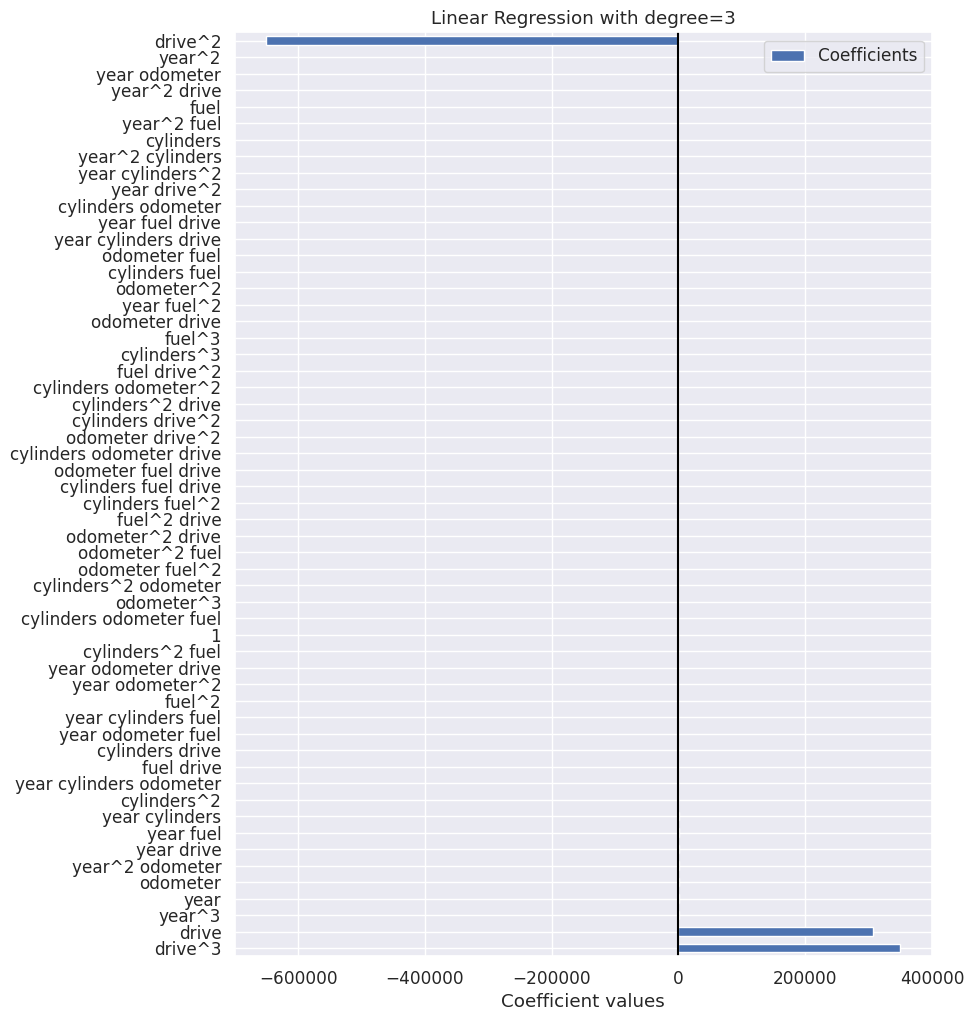

In [56]:
# plot coefficients
coefs.plot.barh(figsize=(9, 12))
plt.title("Linear Regression with degree=3")
plt.axvline(x=0, color="black")
plt.xlabel("Coefficient values")
plt.savefig("images/coefs_linear_regression_degree3_5features.png")

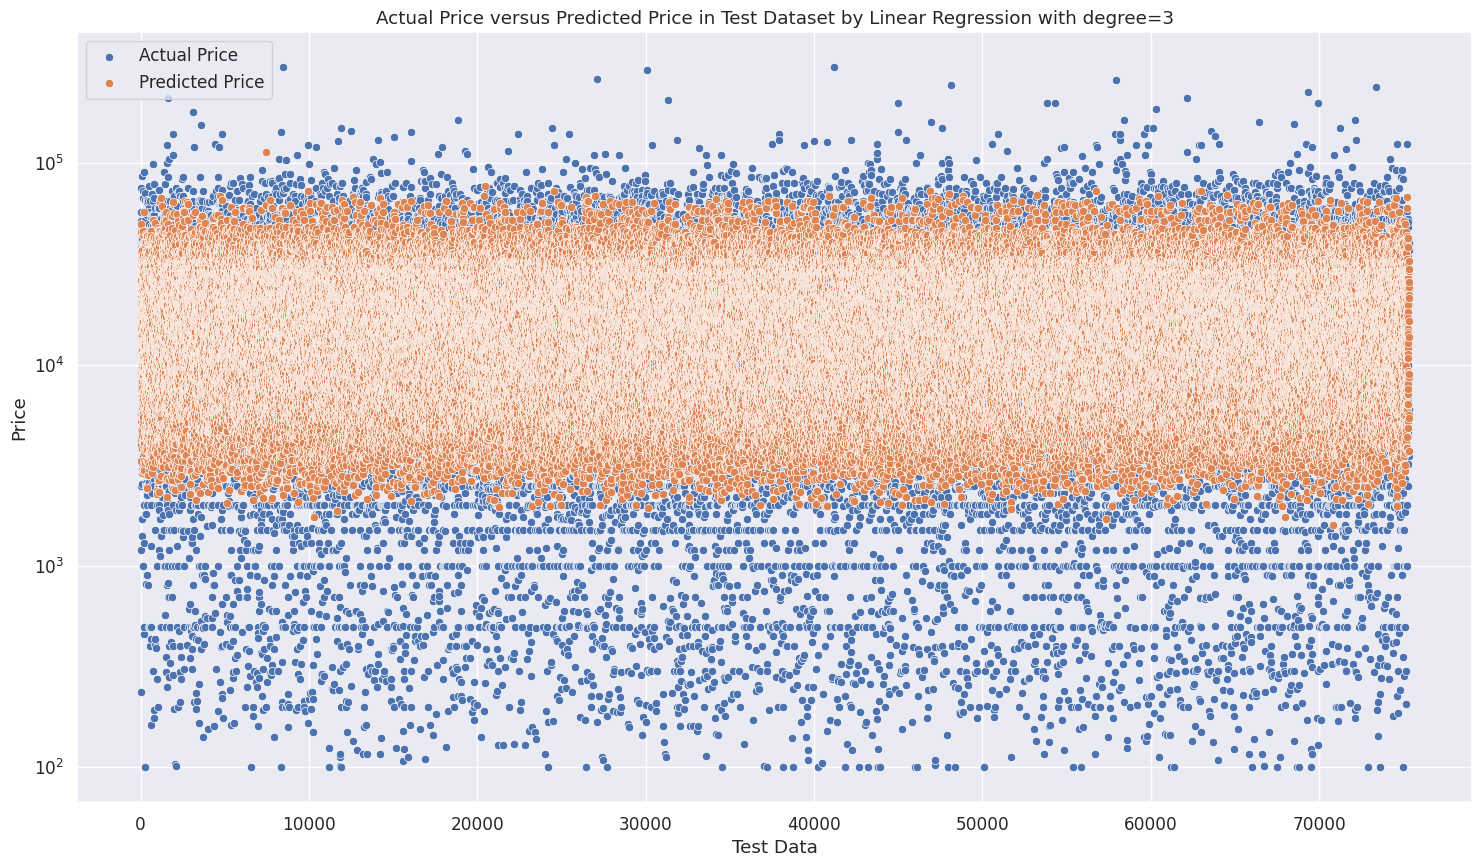

In [57]:
# visualize predicted results
plt.subplots(figsize=(18,10))
splot = sns.scatterplot( x=range(0,len(y_test)), y=y_test, label='Actual Price' )
splot = sns.scatterplot( x=range(0,len(y_test)), y=pipe.predict(X_test[features_list]), label='Predicted Price' )
splot.set(yscale="log")
plt.title('Actual Price versus Predicted Price in Test Dataset by Linear Regression with degree=3')
plt.xlabel('Test Data')
plt.ylabel('Price')
plt.savefig("images/actual_vs_predicted_price_linear_regression_degree3_5features.png")
plt.show()

### Linear Regression with LASSO Model

In [58]:
# Linear Regression with Feature selection by LASSO
alpha = 10.0
features = features = X_train[features_list].select_dtypes(exclude=np.number).columns
ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features), remainder="passthrough" )

pipe = Pipeline([('transformer', ohe_step),
               ('polyfeatures', PolynomialFeatures(degree = best_degree, include_bias = True)),
               ('scaler', StandardScaler(with_mean=False)),
               ('selector', SelectFromModel(Lasso(alpha = alpha, random_state = random_state, max_iter=1500))),
               ('ttregressor', TransformedTargetRegressor(func=np.log1p,
                                                    inverse_func=np.expm1,
                                                    regressor=LinearRegression()))
              ])
#fit on train
pipe.fit(X_train[features_list], y_train)
lr_w_lasso_train_mse = mean_squared_error(y_train, pipe.predict(X_train[features_list]))
lr_w_lasso_test_mse = mean_squared_error(y_test, pipe.predict(X_test[features_list]))
lr_w_lasso_train_mae = mean_absolute_error(y_train, pipe.predict(X_train[features_list]))
lr_w_lasso_test_mae = mean_absolute_error(y_test, pipe.predict(X_test[features_list]))

print('Train MSE:', lr_w_lasso_train_mse)
print('Test MSE :', lr_w_lasso_test_mse)
print('Train MAE:', lr_w_lasso_train_mae)
print('Test MAE :', lr_w_lasso_test_mae)
print('Score    :', pipe.score(X_test[features_list], y_test))

/home/aiuser/anaconda3/envs/ai_env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.693e+12, tolerance: 6.019e+09
  model = cd_fast.enet_coordinate_descent(


Train MSE: 137777789.77804548
Test MSE : 107613731.20369184
Train MAE: 6036.440822888685
Test MAE : 6038.129660670113
Score    : 0.5337634192230974


In [59]:
# get all transformed feature names
transformed_features = pipe.named_steps['transformer'].get_feature_names_out(X_train[features_list].columns)
# remove 'onehotencoder' and 'remainder' prefixes for readability
transformed_features = [str.split(x, sep = '__')[1] for x in transformed_features]
# build feature names
poly_feature_names = pipe.named_steps['polyfeatures'].get_feature_names_out(transformed_features)
# selector feature names
feature_names = pipe.named_steps['selector'].get_feature_names_out(poly_feature_names)
#feature_names.shape

# build a coefficient list to visualize
coefs = pd.DataFrame(
    pipe.named_steps['ttregressor'].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
).sort_values(by='Coefficients', ascending=False)

coefs[abs(coefs['Coefficients']) > 0]

Coefficients
year^2 drive                 18.422146
cylinders drive              18.106416
year^3                       15.589064
fuel drive                   10.960310
year fuel^2                   6.913111
year cylinders fuel           6.698506
year cylinders^2              5.605894
year fuel                     3.396170
drive^3                       0.903688
cylinders^2 odometer          0.590114
odometer                      0.392403
cylinders^2 fuel              0.389114
odometer fuel^2               0.335393
odometer^3                    0.069315
odometer^2 drive              0.011512
odometer drive^2              0.004973
fuel^2 drive                 -0.001793
year odometer drive          -0.023481
cylinders odometer drive     -0.066051
odometer^2 fuel              -0.140123
cylinders fuel^2             -0.335129
odometer fuel                -0.541122
fuel drive^2                 -0.796991
cylinders odometer           -0.863896
fuel^3                       -1.402082
fuel^2                       -4.117868
year^2 fuel                  -5.012856
cylinders^2                  -5.527611
cylinders fuel               -6.722495
year fuel drive              -9.978473
year                        -15.300238
year cylinders drive        -18.204495
year drive                  -19.254779

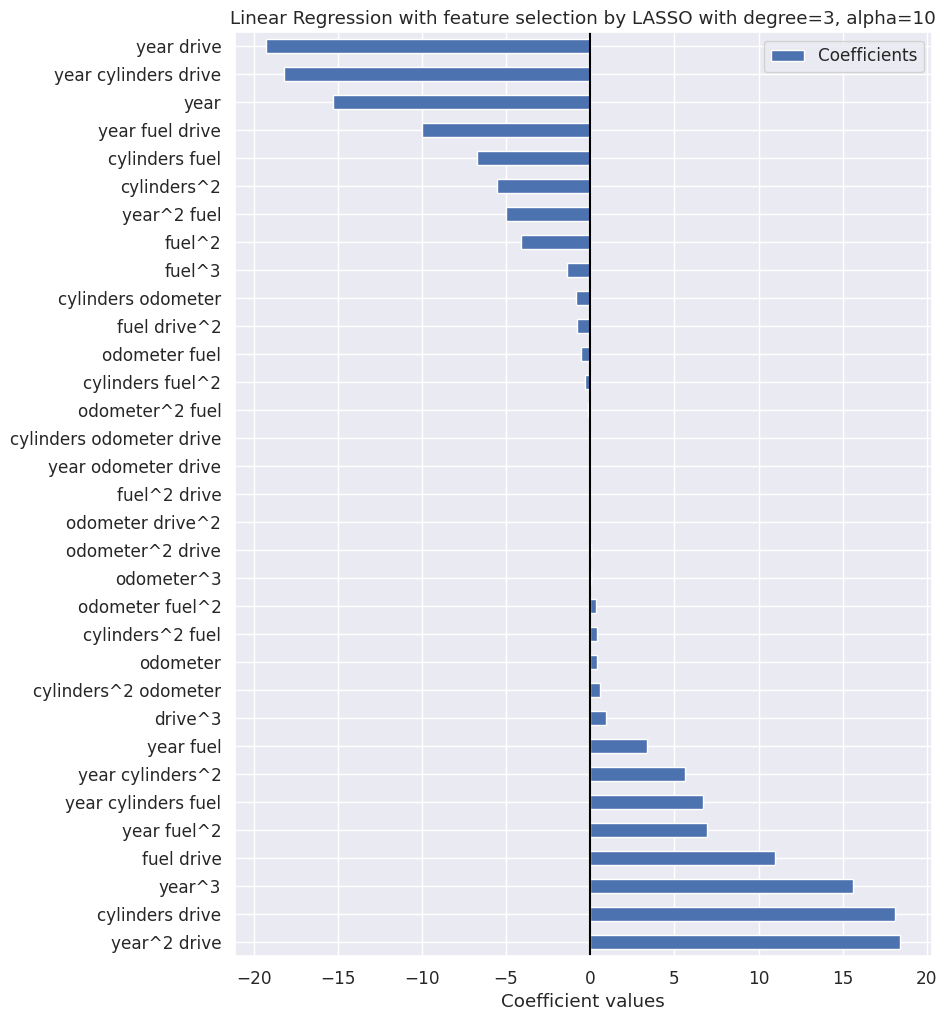

In [60]:
# plot coefficients
coefs.plot.barh(figsize=(9, 12))
plt.title("Linear Regression with feature selection by LASSO with degree=3, alpha=10")
plt.axvline(x=0, color="black")
plt.xlabel("Coefficient values")
plt.savefig("images/coefs_fs_lasso_degree3_alpha10_5features.png")

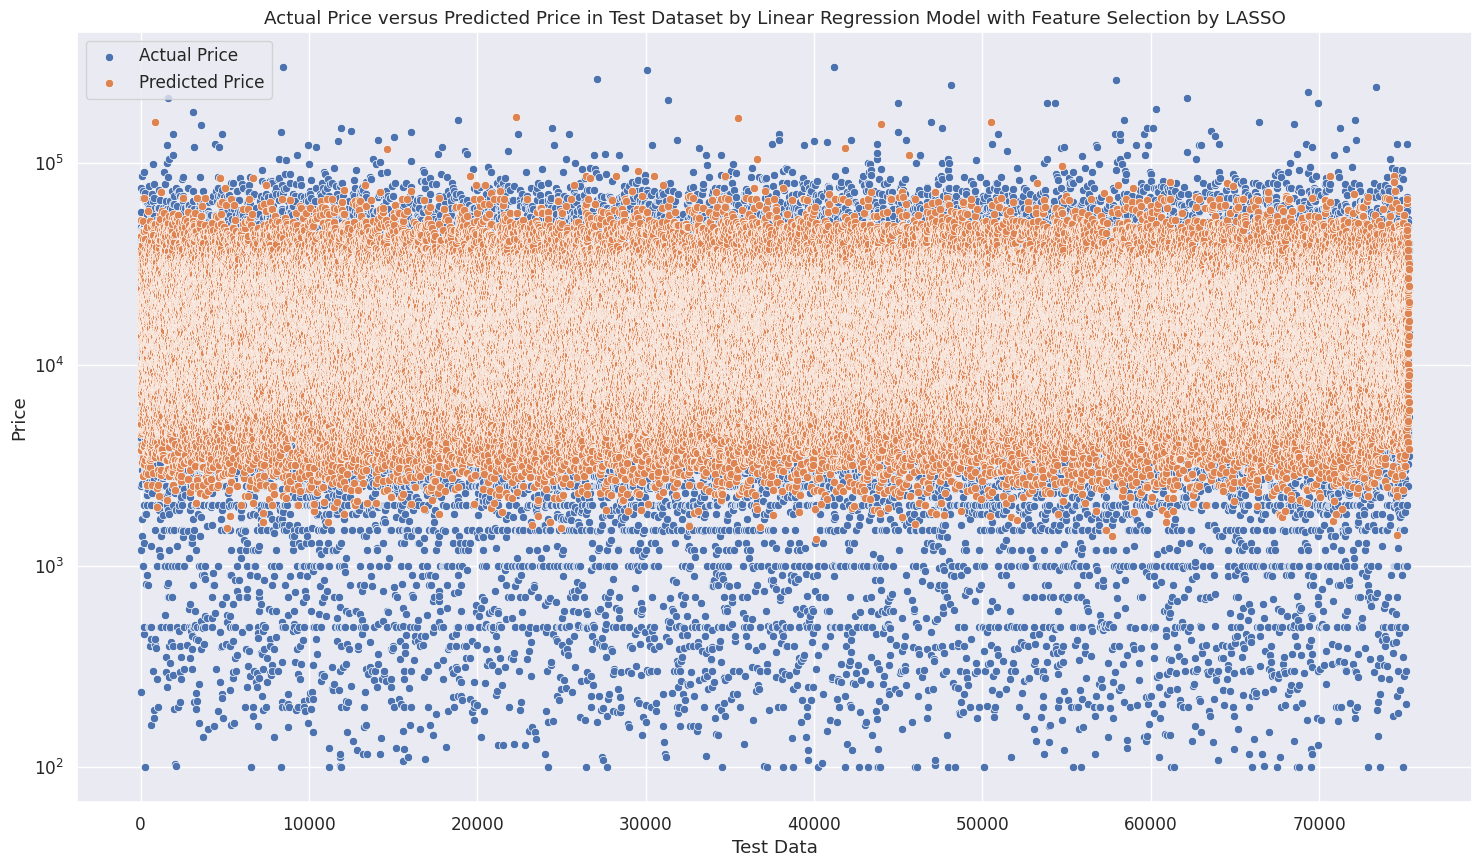

In [61]:
# visualize predicted results
plt.subplots(figsize=(18,10))
splot = sns.scatterplot( x=range(0,len(y_test)), y=y_test, label='Actual Price' )
splot = sns.scatterplot( x=range(0,len(y_test)), y=pipe.predict(X_test[features_list]), label='Predicted Price' )
splot.set(yscale="log")
plt.title('Actual Price versus Predicted Price in Test Dataset by Linear Regression Model with Feature Selection by LASSO')
plt.xlabel('Test Data')
plt.ylabel('Price')
plt.savefig("images/actual_vs_predicted_price_lasso_linear_regression_degree3_alpha10_5features.png")
plt.show()

### Linear Regression SFS with LASSO Model

In [62]:
# Linear Regression with Sequential Feature selection by LASSO
alpha = 0.01
n_features_to_select = 'auto'
max_iterations = 5
tol = 0.5

features = features = X_train[features_list].select_dtypes(exclude=np.number).columns
ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features), remainder="passthrough" )

pipe = Pipeline([('transformer', ohe_step),
               ('polyfeatures', PolynomialFeatures(degree = best_degree, include_bias = True)),
               ('scaler', StandardScaler(with_mean=False)),
               ('sfs', SequentialFeatureSelector(n_features_to_select = n_features_to_select, estimator =
                                                 Lasso(alpha = alpha, 
                                                       random_state = random_state, 
                                                       max_iter = max_iterations, 
                                                       tol = tol))),
               ('ttregressor', TransformedTargetRegressor(func=np.log1p,
                                                    inverse_func=np.expm1,
                                                    regressor=LinearRegression()))
              ])
#fit on train
pipe.fit(X_train[features_list], y_train)
sfs_w_lasso_train_mse = mean_squared_error(y_train, pipe.predict(X_train[features_list]))
sfs_w_lasso_test_mse = mean_squared_error(y_test, pipe.predict(X_test[features_list]))
sfs_w_lasso_train_mae = mean_absolute_error(y_train, pipe.predict(X_train[features_list]))
sfs_w_lasso_test_mae = mean_absolute_error(y_test, pipe.predict(X_test[features_list]))

print('Train MSE:', lr_w_lasso_train_mse)
print('Test MSE :', lr_w_lasso_test_mse)
print('Train MAE:', lr_w_lasso_train_mae)
print('Test MAE :', lr_w_lasso_test_mae)
print('Score    :', pipe.score(X_test[features_list], y_test))

Train MSE: 137777789.77804548
Test MSE : 107613731.20369184
Train MAE: 6036.440822888685
Test MAE : 6038.129660670113
Score    : 0.5167220350837793


In [63]:
# get all transformed feature names
transformed_features = pipe.named_steps['transformer'].get_feature_names_out(X_train[features_list].columns)
# remove 'onehotencoder' and 'remainder' prefixes for readability
transformed_features = [str.split(x, sep = '__')[1] for x in transformed_features]
# build feature names
poly_feature_names = pipe.named_steps['polyfeatures'].get_feature_names_out(transformed_features)
# selector feature names
feature_names = pipe.named_steps['sfs'].get_feature_names_out(poly_feature_names)
#feature_names.shape

# build a coefficient list to visualize
coefs = pd.DataFrame(
    pipe.named_steps['ttregressor'].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
).sort_values(by='Coefficients', ascending=False)

coefs

Coefficients
year^2 fuel           7.738074e+02
fuel                  7.584453e+02
drive^3               2.668967e+01
year^2 drive          2.254516e+01
cylinders drive       4.327058e+00
year cylinders^2      3.637379e+00
fuel^2                2.548667e+00
cylinders^2 fuel      1.301452e+00
odometer fuel^2       2.623638e-01
odometer^3            2.133168e-01
year^3                2.117557e-01
fuel^2 drive          6.636044e-02
odometer^2 drive      1.584043e-02
1                     1.190810e-12
cylinders odometer   -2.010427e-02
odometer drive       -3.806321e-02
cylinders^2 drive    -3.970232e-02
odometer fuel drive  -5.123917e-02
odometer^2 fuel      -1.692492e-01
odometer^2           -1.966048e-01
odometer fuel        -2.913717e-01
cylinders^3          -9.637046e-01
fuel^3               -1.442141e+00
year cylinders fuel  -1.682468e+00
cylinders^2          -2.367979e+00
year cylinders drive -4.464012e+00
year drive^2         -4.855096e+01
year fuel            -1.532677e+03

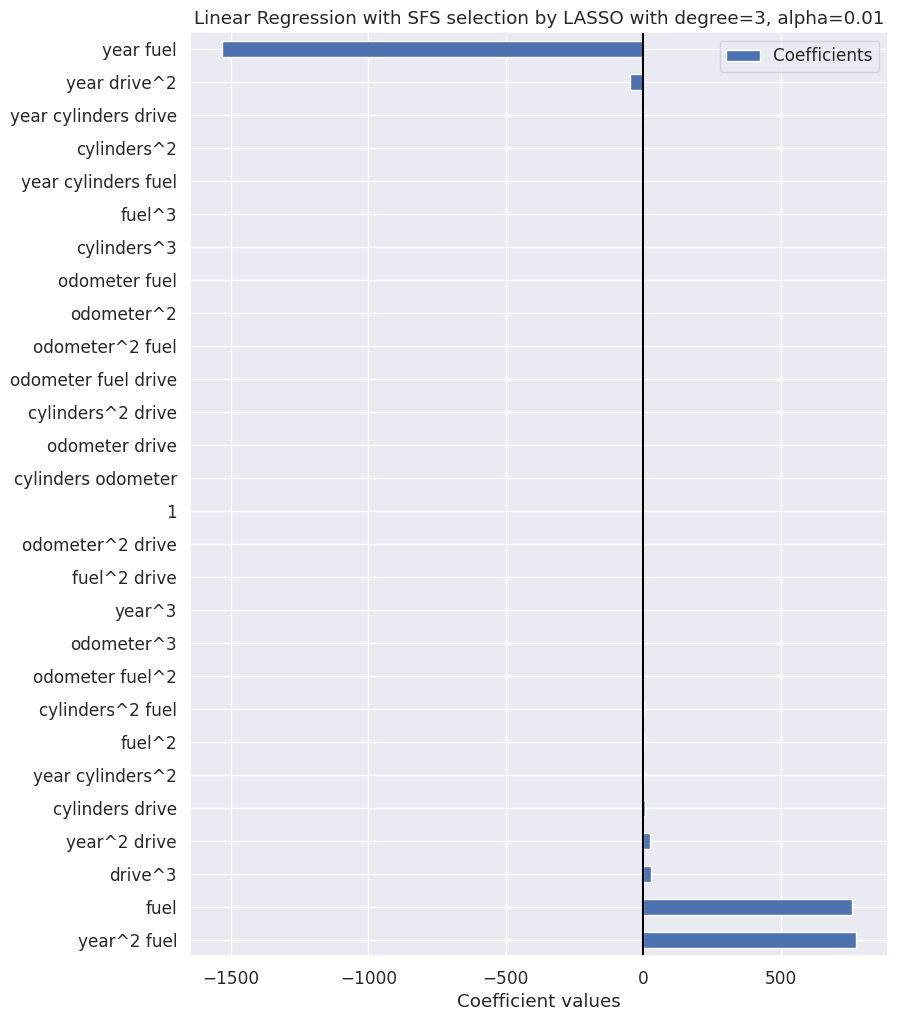

In [64]:
# plot coefficients
coefs.plot.barh(figsize=(9, 12))
plt.title("Linear Regression with SFS selection by LASSO with degree=3, alpha=0.01")
plt.axvline(x=0, color="black")
plt.xlabel("Coefficient values")
plt.savefig("images/coefs_sfs_lasso_degree3_alpha_001_5features.png")

The Model that minimized Test Error was: 3


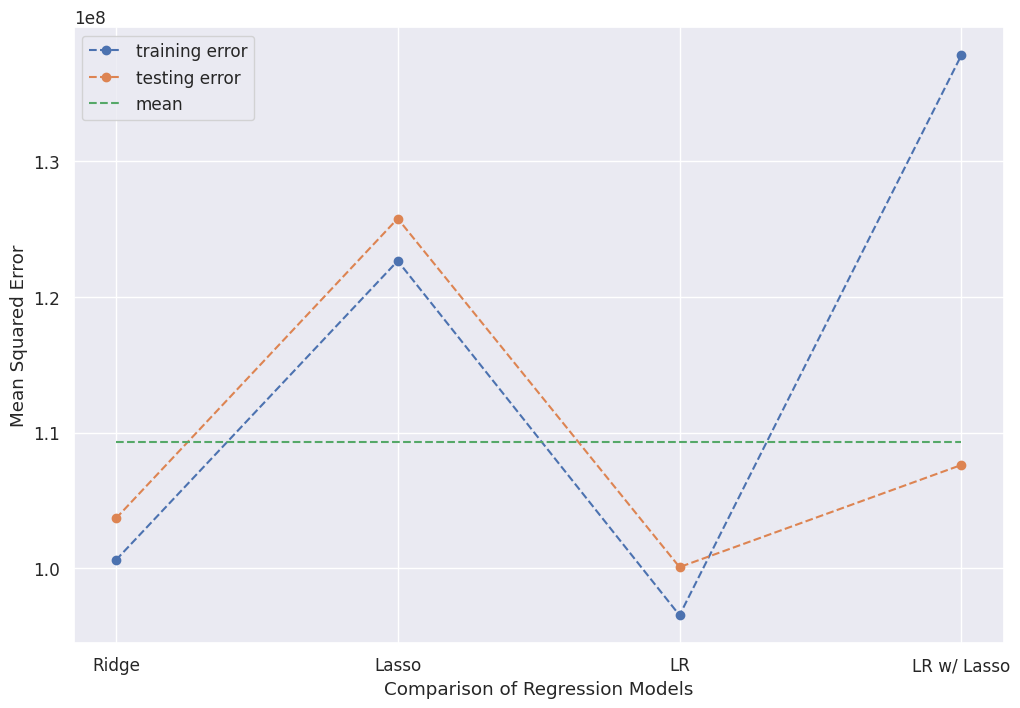

In [65]:
# Compare all 4 MSE results!
test_mses = [ridge_test_mse, lasso_test_mse, lr_test_mse, lr_w_lasso_test_mse]
train_mses = [ridge_train_mse, lasso_train_mse, lr_train_mse, lr_w_lasso_train_mse]
print(f'The Model that minimized Test Error was: {test_mses.index(min(test_mses)) + 1}')
plt.subplots(figsize=(12,8))
plt.plot(range(1, 5), train_mses, '--o', label = 'training error')
plt.plot(range(1, 5), test_mses, '--o', label = 'testing error')
plt.plot(range(1, 5), [np.mean(test_mses)]*4, '--', label = 'mean')
plt.xticks(range(1, 5), ['Ridge', 'Lasso', 'LR', 'LR w/ Lasso'])
plt.xlabel('Comparison of Regression Models')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.savefig("images/4models_best_mse_test_error.png")

The Model that minimized Test Error was: 3


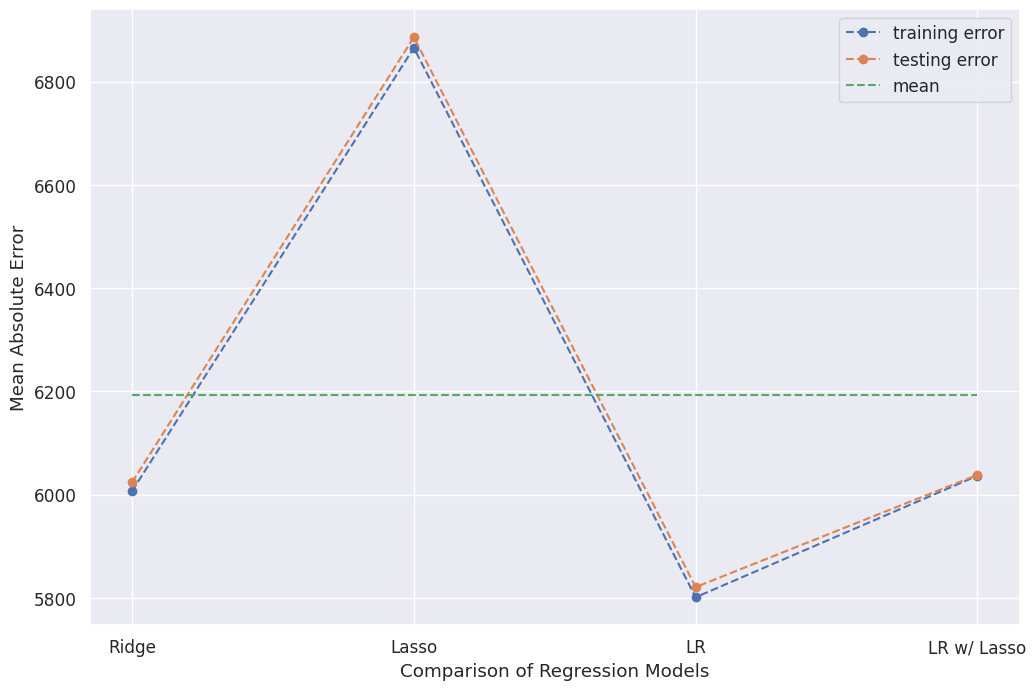

In [66]:
# Compare all 4 MAE results!
test_maes = [ridge_test_mae, lasso_test_mae, lr_test_mae, lr_w_lasso_test_mae]
train_maes = [ridge_train_mae, lasso_train_mae, lr_train_mae, lr_w_lasso_train_mae]
print(f'The Model that minimized Test Error was: {test_maes.index(min(test_maes)) + 1}')
plt.subplots(figsize=(12,8))
plt.plot(range(1, 5), train_maes, '--o', label = 'training error')
plt.plot(range(1, 5), test_maes, '--o', label = 'testing error')
plt.plot(range(1, 5), [np.mean(test_maes)]*4, '--', label = 'mean')
plt.xticks(range(1, 5), ['Ridge', 'Lasso', 'LR', 'LR w/ Lasso'])
plt.xlabel('Comparison of Regression Models')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.savefig("images/4models_best_mae_test_error.png")

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Summarized overview of the key findings and insights:

   - Variance Inflation Factor (VIF):            
       > Variables like 'manufacturer', 'title_status', 'region', 'state', 'odometer' showed low VIF values, indicating lower multicollinearity among them.

   - Permutation Importance:
       > Permutation importance technique was used to assess feature importance.
            'year', 'cylinders', 'odometer', 'fuel', 'drive' were identified as important features for the model's predictions.

   - Models and Their Performances:

       > Ridge Model with Best Degree 3 and Alpha 10:
                This model achieves a relatively good balance between train and test MSEs.
                Coefficients suggest some features are positively correlated with prices (e.g., higher year values), while others are negatively correlated (e.g., higher odometer readings).
                The model performs reasonably well, with a score of around 0.57.
                A subset of features based on permutation importance is used for this model.

       > LASSO Model:
                The LASSO model yields lower performance compared to Ridge in terms of MSE and MAE.
                Coefficients are sparse, meaning the model emphasizes a subset of features.
                The model score is lower at around 0.46.

       > Linear Regression Models:
                The plain Linear Regression models (both with and without LASSO) perform better than LASSO but slightly worse than Ridge in terms of MSE and MAE.
                Some coefficients have large magnitudes, which could indicate multicollinearity or overfitting.

       > Linear Regression with SFS LASSO Model:
                This model seems to have slightly worse performance compared to the standard Linear Regression models.
                The coefficient selection seems to focus on fewer features.

      Overall, the analysis involved assessing multicollinearity, feature importance, model complexity, and evaluating different regression techniques (Ridge, Lasso, Linear) with various sets of features. The model scores and coefficients suggest that these models will perform exceptionally well, as indicated by the positive scores and relatively low MSE values.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

#### Report: Fine-Tuning Used Car Inventory with Regression Analysis
     
   > In response to your interest in optimizing your used car inventory, we conducted a thorough analysis using regression techniques. Our goal was to identify insights and strategies for fine-tuning your inventory management. This report summarizes our findings and recommendations based on the data analysis performed.

  #### Methodology:
   > We conducted an in-depth analysis of a dataset containing various features related to used cars and their prices. The analysis involved exploring feature importance, model selection, performance evaluation, and interpreting model coefficients.

  #### Key Findings:

  - Feature Importance:
   > Features such as year, odometer, and drive were identified as crucial drivers of used car prices. These features had the most significant impact on price prediction based on variable inflation factor and permutation importance.

  - Model Selection:
   > After rigorous testing, the Ridge model with a polynomial degree of 3 and an alpha value of 10 emerged as the preferred model. This model provided a balanced trade-off between prediction accuracy and model complexity.

  - Insights from Coefficients:
   > The Ridge model's coefficients shed light on the relationships between features and prices. For instance, higher year values and certain drive types were associated with increased prices. Conversely, higher odometer readings had a negative impact on prices.

  - Recommendations:
   > Refinement of Feature Selection: 
        Further refinement of feature selection is recommended using techniques like recursive feature elimination to optimize model performance.
   > Feature Engineering: 
        Consider generating additional features or transforming existing ones to capture non-linear relationships and enhance model performance.
   > Validation and Testing: 
        Perform thorough cross-validation to ensure the model's reliability in generalizing to new data.
   > Interpretation: 
        Focus on interpreting the coefficients in terms of real-world implications for used car dealers.

 #### Model Performance:

   - Ridge Model (Degree 3, Alpha 10) with Top 5 Features:
        Train MSE: 100,610,406.81
        Test MSE: 103,677,988.43
        Train MAE: 6,006.52
        Test MAE: 6,023.53
        Score: 0.55

   - LASSO Model with Top 5 Features:
        Train MSE: 122,637,942.29
        Test MSE: 125,754,086.79
        Train MAE: 6,865.58
        Test MAE: 6,886.02
        Score: 0.46

   - Linear Regression Models with Top 5 Features:
        Linear Regression Model:
            Train MSE: 96,550,126.10
            Test MSE: 100,094,895.75
            Train MAE: 5,800.98
            Test MAE: 5,820.69
            Score: 0.57
        Linear Regression with LASSO:
            Train MSE: 137,777,789.78
            Test MSE: 107,613,731.20
            Train MAE: 6,036.44
            Test MAE: 6,038.13
            Score: 0.53
        Linear Regression with SFS LASSO:
            Train MSE: 137,777,789.78
            Test MSE: 107,613,731.20
            Train MAE: 6,036.44
            Test MAE: 6,038.13
            Score: 0.52

 #### Conclusion:
   
   - In conclusion, our analysis suggests that the Ridge model with a polynomial degree of 3 and an alpha value of 10 is the most suitable model for predicting used car prices. This model effectively balances prediction accuracy and model complexity. Key features like year, odometer, and drive play a crucial role in determining prices. Further model refinement, feature engineering, and thorough validation will contribute to enhancing the model's reliability and practical applicability for used car dealers.